## Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
#Getting jupyter ready

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

C:\Users\Blessy Thomas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Understanding data, used from kaggle 

application_df= pd.read_csv("application_data.csv")
previous_df = pd.read_csv("previous_application.csv")


In [5]:
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [6]:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

# Inspect Data frames

In [7]:
#Database dimension
print("Database Dimension- application_df   :", application_df.shape)
print("Database Dimension- previous_df      :", previous_df.shape)

#Database size
print("Database Size - application_df       :", application_df.size)
print("Database Size - previous_df          :", previous_df.size)


Database Dimension- application_df   : (307511, 122)
Database Dimension- previous_df      : (1670214, 37)
Database Size - application_df       : 37516342
Database Size - previous_df          : 61797918


In [8]:
# Database column types
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
previous_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
#checking the numerical variables of the dataframes
application_df.describe()


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [11]:
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115833    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

# Data Cleaning and Manipulation

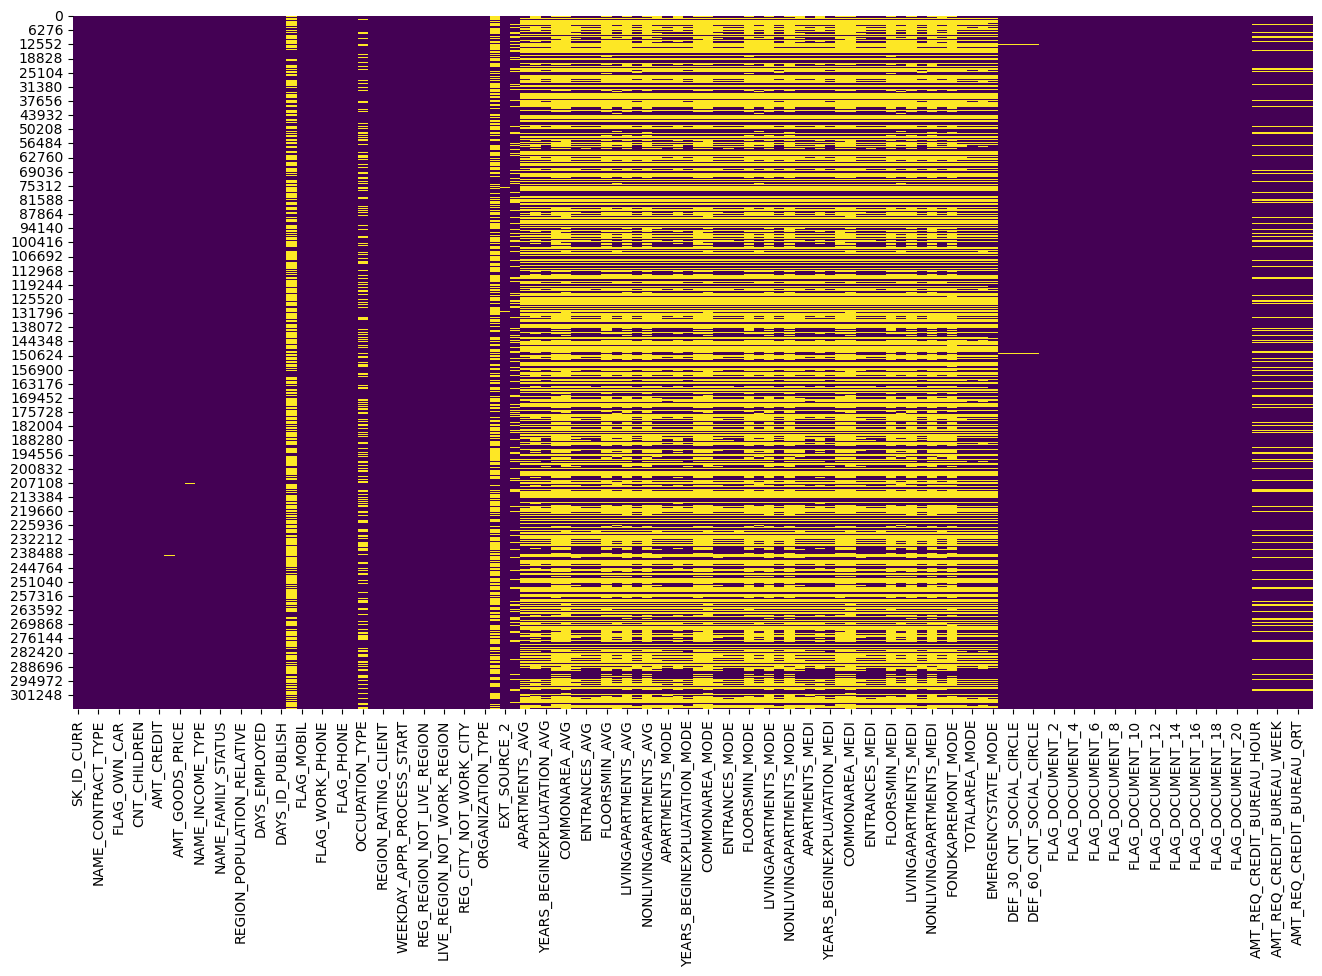

In [12]:
# Finding missing values

# Create a boolean dataframe based on whether values are null
missing_values = application_df.isnull()

# Create a heatmap from the boolean dataframe
plt.figure(figsize=(16,9)) # Increase the size of the heatmap
sns.heatmap(data=missing_values, cbar=False, cmap='viridis')

plt.show()


Insight: A lot of missing values are there 

In [13]:
# % of null value in each column

round(application_df.isnull().sum() / application_df.shape[0] * 100.00,2)


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

Insight: A lot of columns have more than 50% of missing values. We'll plot the missing % columns with 40% as cut off marks.

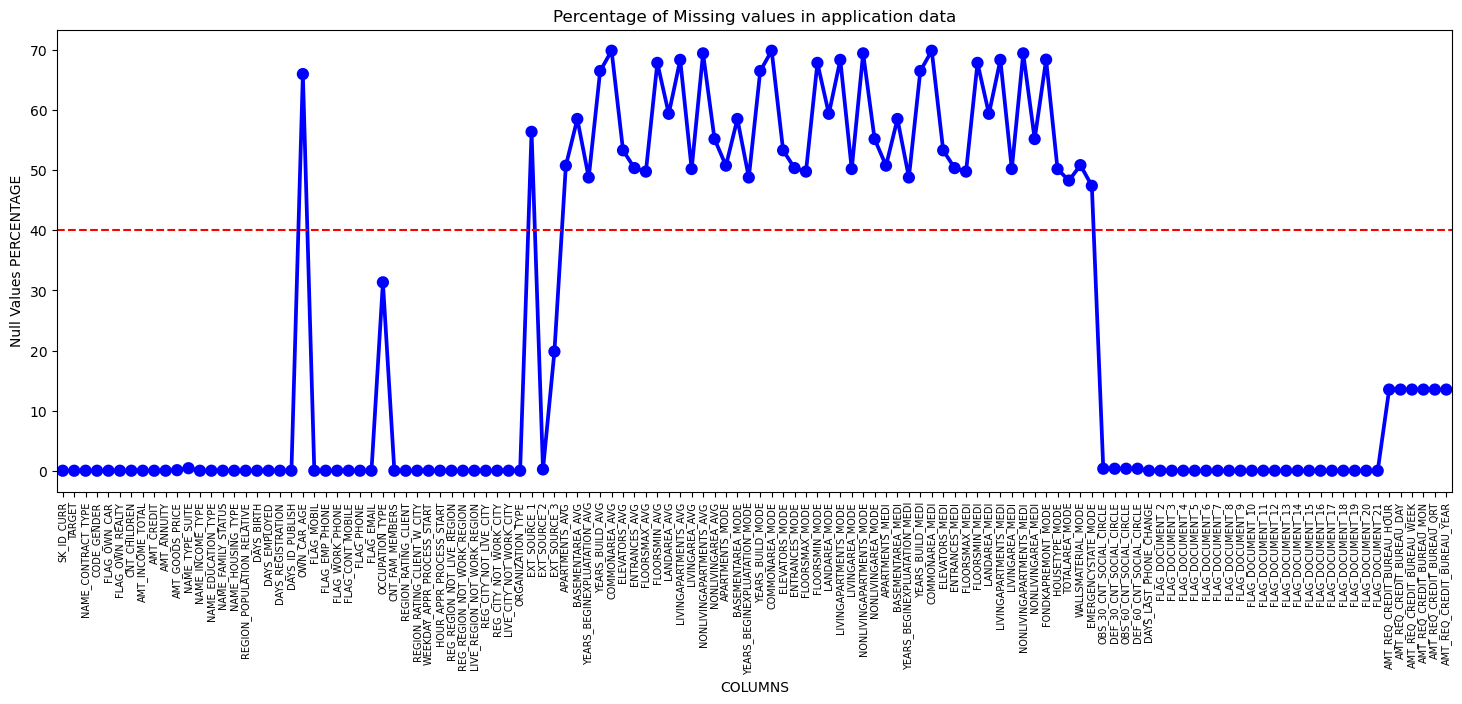

In [14]:
null_application_df = pd.DataFrame((application_df.isnull().sum())*100/application_df.shape[0]).reset_index()
null_application_df.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_application_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red') #cutoff line at 40%
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [15]:
# more than or equal to 40% empty rows columns
nullcol_40_application = null_application_df[null_application_df["Null Values Percentage"]>=40]
nullcol_40_application

Column Name  Null Values Percentage
21                   OWN_CAR_AGE               65.990810
41                  EXT_SOURCE_1               56.381073
44                APARTMENTS_AVG               50.749729
45              BASEMENTAREA_AVG               58.515956
46   YEARS_BEGINEXPLUATATION_AVG               48.781019
47               YEARS_BUILD_AVG               66.497784
48                COMMONAREA_AVG               69.872297
49                 ELEVATORS_AVG               53.295980
50                 ENTRANCES_AVG               50.348768
51                 FLOORSMAX_AVG               49.760822
52                 FLOORSMIN_AVG               67.848630
53                  LANDAREA_AVG               59.376738
54          LIVINGAPARTMENTS_AVG               68.354953
55                LIVINGAREA_AVG               50.193326
56       NONLIVINGAPARTMENTS_AVG               69.432963
57             NONLIVINGAREA_AVG               55.179164
58               APARTMENTS_MODE               50.749729
59             BASEMENTAREA_MODE               58.515956
60  YEARS_BEGINEXPLUATATION_MODE               48.781019
61              YEARS_BUILD_MODE               66.497784
62               COMMONAREA_MODE               69.872297
63                ELEVATORS_MODE               53.295980
64                ENTRANCES_MODE               50.348768
65                FLOORSMAX_MODE               49.760822
66                FLOORSMIN_MODE               67.848630
67                 LANDAREA_MODE               59.376738
68         LIVINGAPARTMENTS_MODE               68.354953
69               LIVINGAREA_MODE               50.193326
70      NONLIVINGAPARTMENTS_MODE               69.432963
71            NONLIVINGAREA_MODE               55.179164
72               APARTMENTS_MEDI               50.749729
73             BASEMENTAREA_MEDI               58.515956
74  YEARS_BEGINEXPLUATATION_MEDI               48.781019
75              YEARS_BUILD_MEDI               66.497784
76               COMMONAREA_MEDI               69.872297
77                ELEVATORS_MEDI               53.295980
78                ENTRANCES_MEDI               50.348768
79                FLOORSMAX_MEDI               49.760822
80                FLOORSMIN_MEDI               67.848630
81                 LANDAREA_MEDI               59.376738
82         LIVINGAPARTMENTS_MEDI               68.354953
83               LIVINGAREA_MEDI               50.193326
84      NONLIVINGAPARTMENTS_MEDI               69.432963
85            NONLIVINGAREA_MEDI               55.179164
86            FONDKAPREMONT_MODE               68.386172
87                HOUSETYPE_MODE               50.176091
88                TOTALAREA_MODE               48.268517
89            WALLSMATERIAL_MODE               50.840783
90           EMERGENCYSTATE_MODE               47.398304

In [16]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

Insight: Total of 49 columns are there which have more than 40% null values.
Seems like most of the columns with high missing values are related to different area sizes on apartment
owned/rented by the loan applicant.

In [ ]:
# Previous_df missing values

<Axes: >

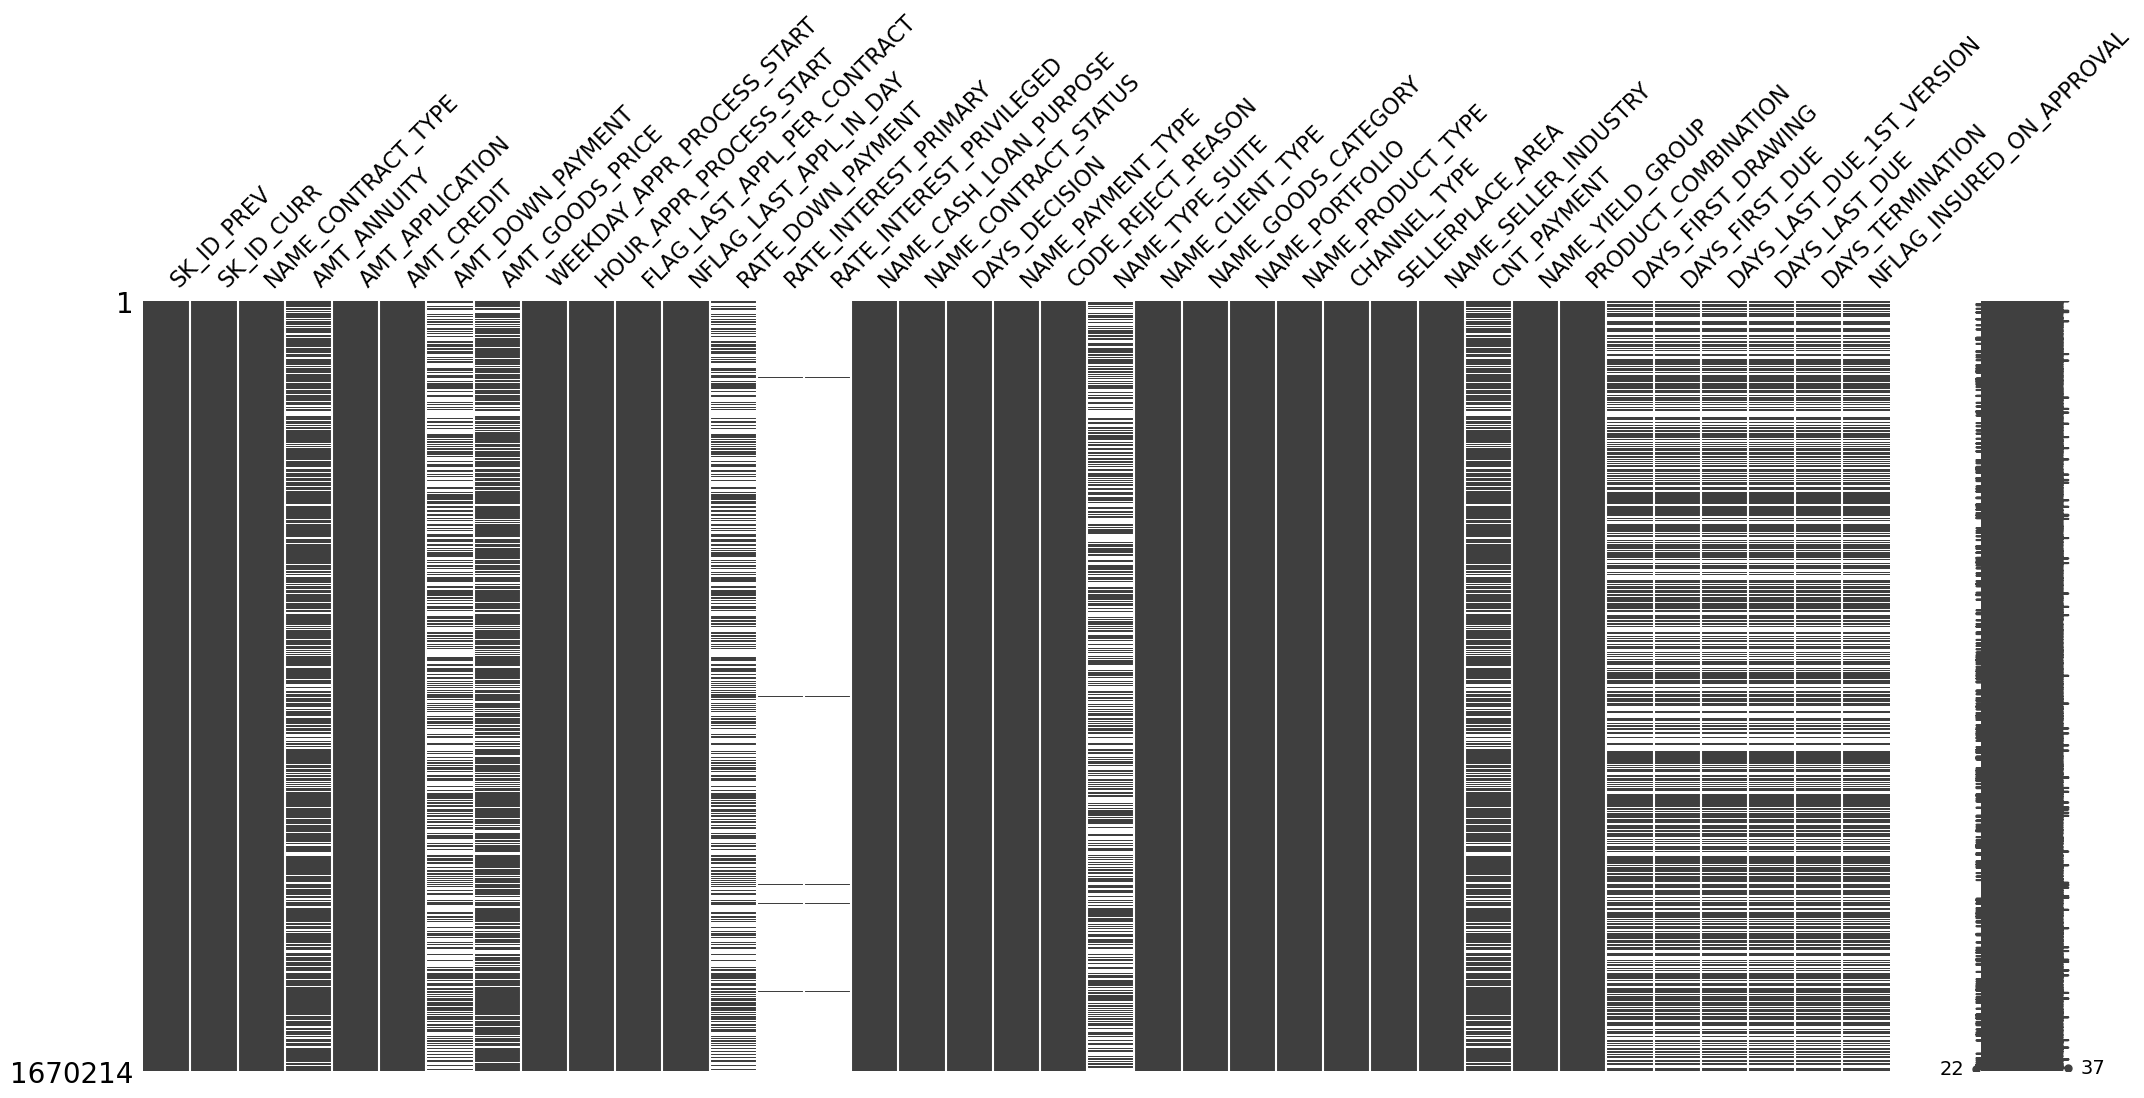

In [17]:
import missingno as mn
mn.matrix(previous_df)

Insight: From the matrix, it is evidednt that the dataset has many missing values. 
Let's check for each column what is the % of missing values.

In [18]:
round(previous_df.isnull().sum()/previous_df.shape[0]*100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
#plotting the missing value percantages with 40% as cut of criteria

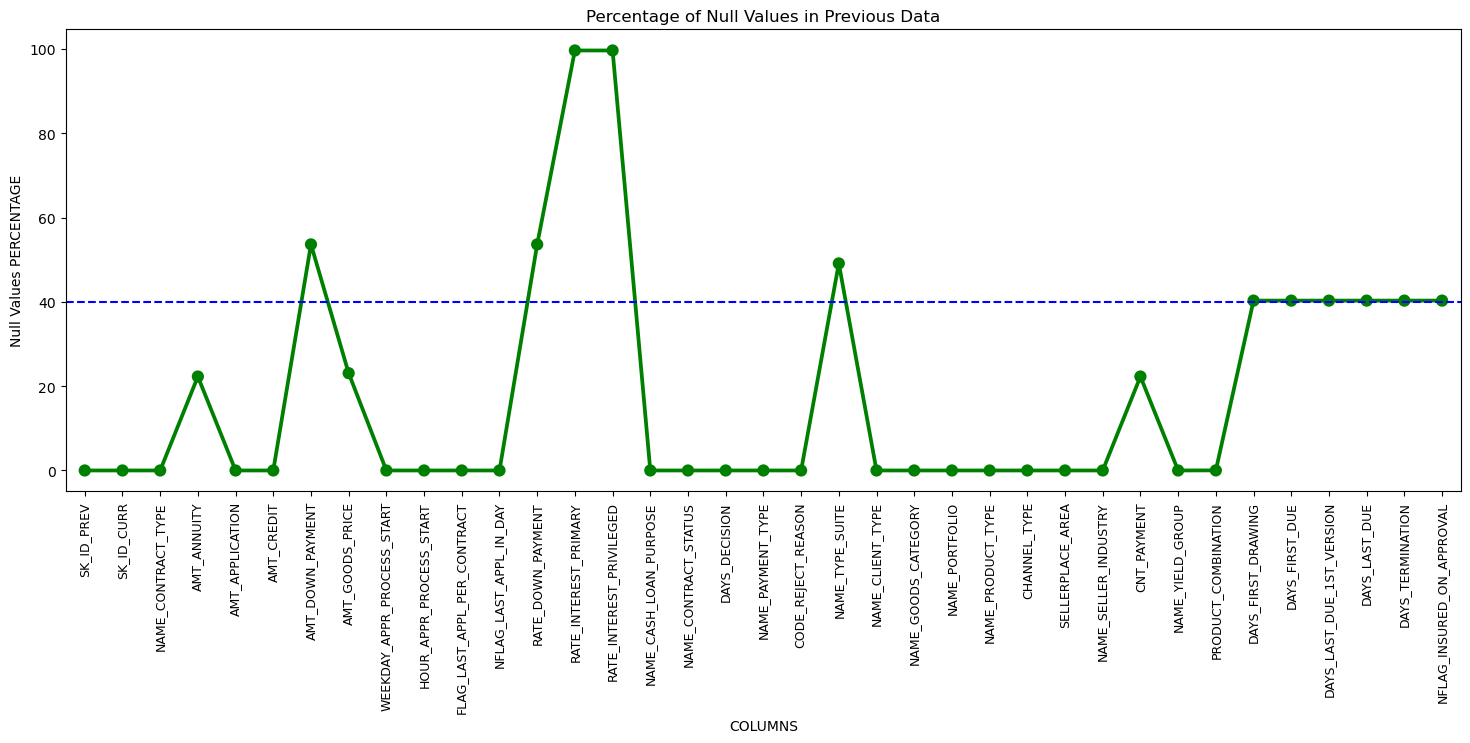

In [19]:
null_previous_df= pd.DataFrame((previous_df.isnull().sum()*100)/ previous_df.shape[0]).reset_index()
null_previous_df.columns=["Column Name", "Null Values Percentage"]
fig = plt.figure(figsize=(18,6))
ax =sns.pointplot(x= "Column Name", y= "Null Values Percentage", data=null_previous_df, color="green")
plt.xticks(rotation=90, fontsize=9)
ax.axhline(40, ls='--', color='blue')
plt.title("Percentage of Null Values in Previous Data")
plt.xlabel("COLUMNS")
plt.ylabel("Null Values PERCENTAGE")
plt.show()

Insight: Few columns are above 40% with null values.

In [20]:
#more than or equal to 40% empty rows columns

null_40_previous = null_previous_df[null_previous_df["Null Values Percentage"]>=40]
null_40_previous

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [21]:
len(null_40_previous)

11

Insight: There are 11 columns with more than 40% null values. These can be deleted from the data as they don't hold much
importance in our analysis. Let's review if there are anymore columns to be dropped.

# Analyse and Delete Unecessary columns

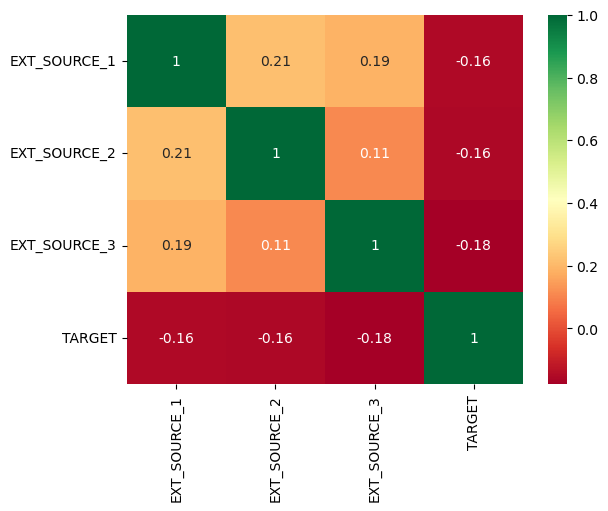

In [22]:
#Checking correlation between EXT_SOURCE_X columns vs TARGET column
Source = application_df[["EXT_SOURCE_1","EXT_SOURCE_2", "EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr, xticklabels=source_corr.columns, yticklabels=source_corr.columns, annot=True, cmap="RdYlGn")


Insight:
Based on the heatmap, we can see there is almost no correlation between
EXT_SOURCE_X columns and target column, we can drop these columns.
EXT_SOURCE_1 has more than 40% null values, hence already in the null columns

In [23]:
#create a list of columns that needs to be dropped including the
#columns with >40% null values as they are alreayd of no use.

Unwanted_application = nullcol_40_application["Column Name"].tolist()+['EXT_SOURCE_2','EXT_SOURCE_3']
len(Unwanted_application)

51

# Flag Document

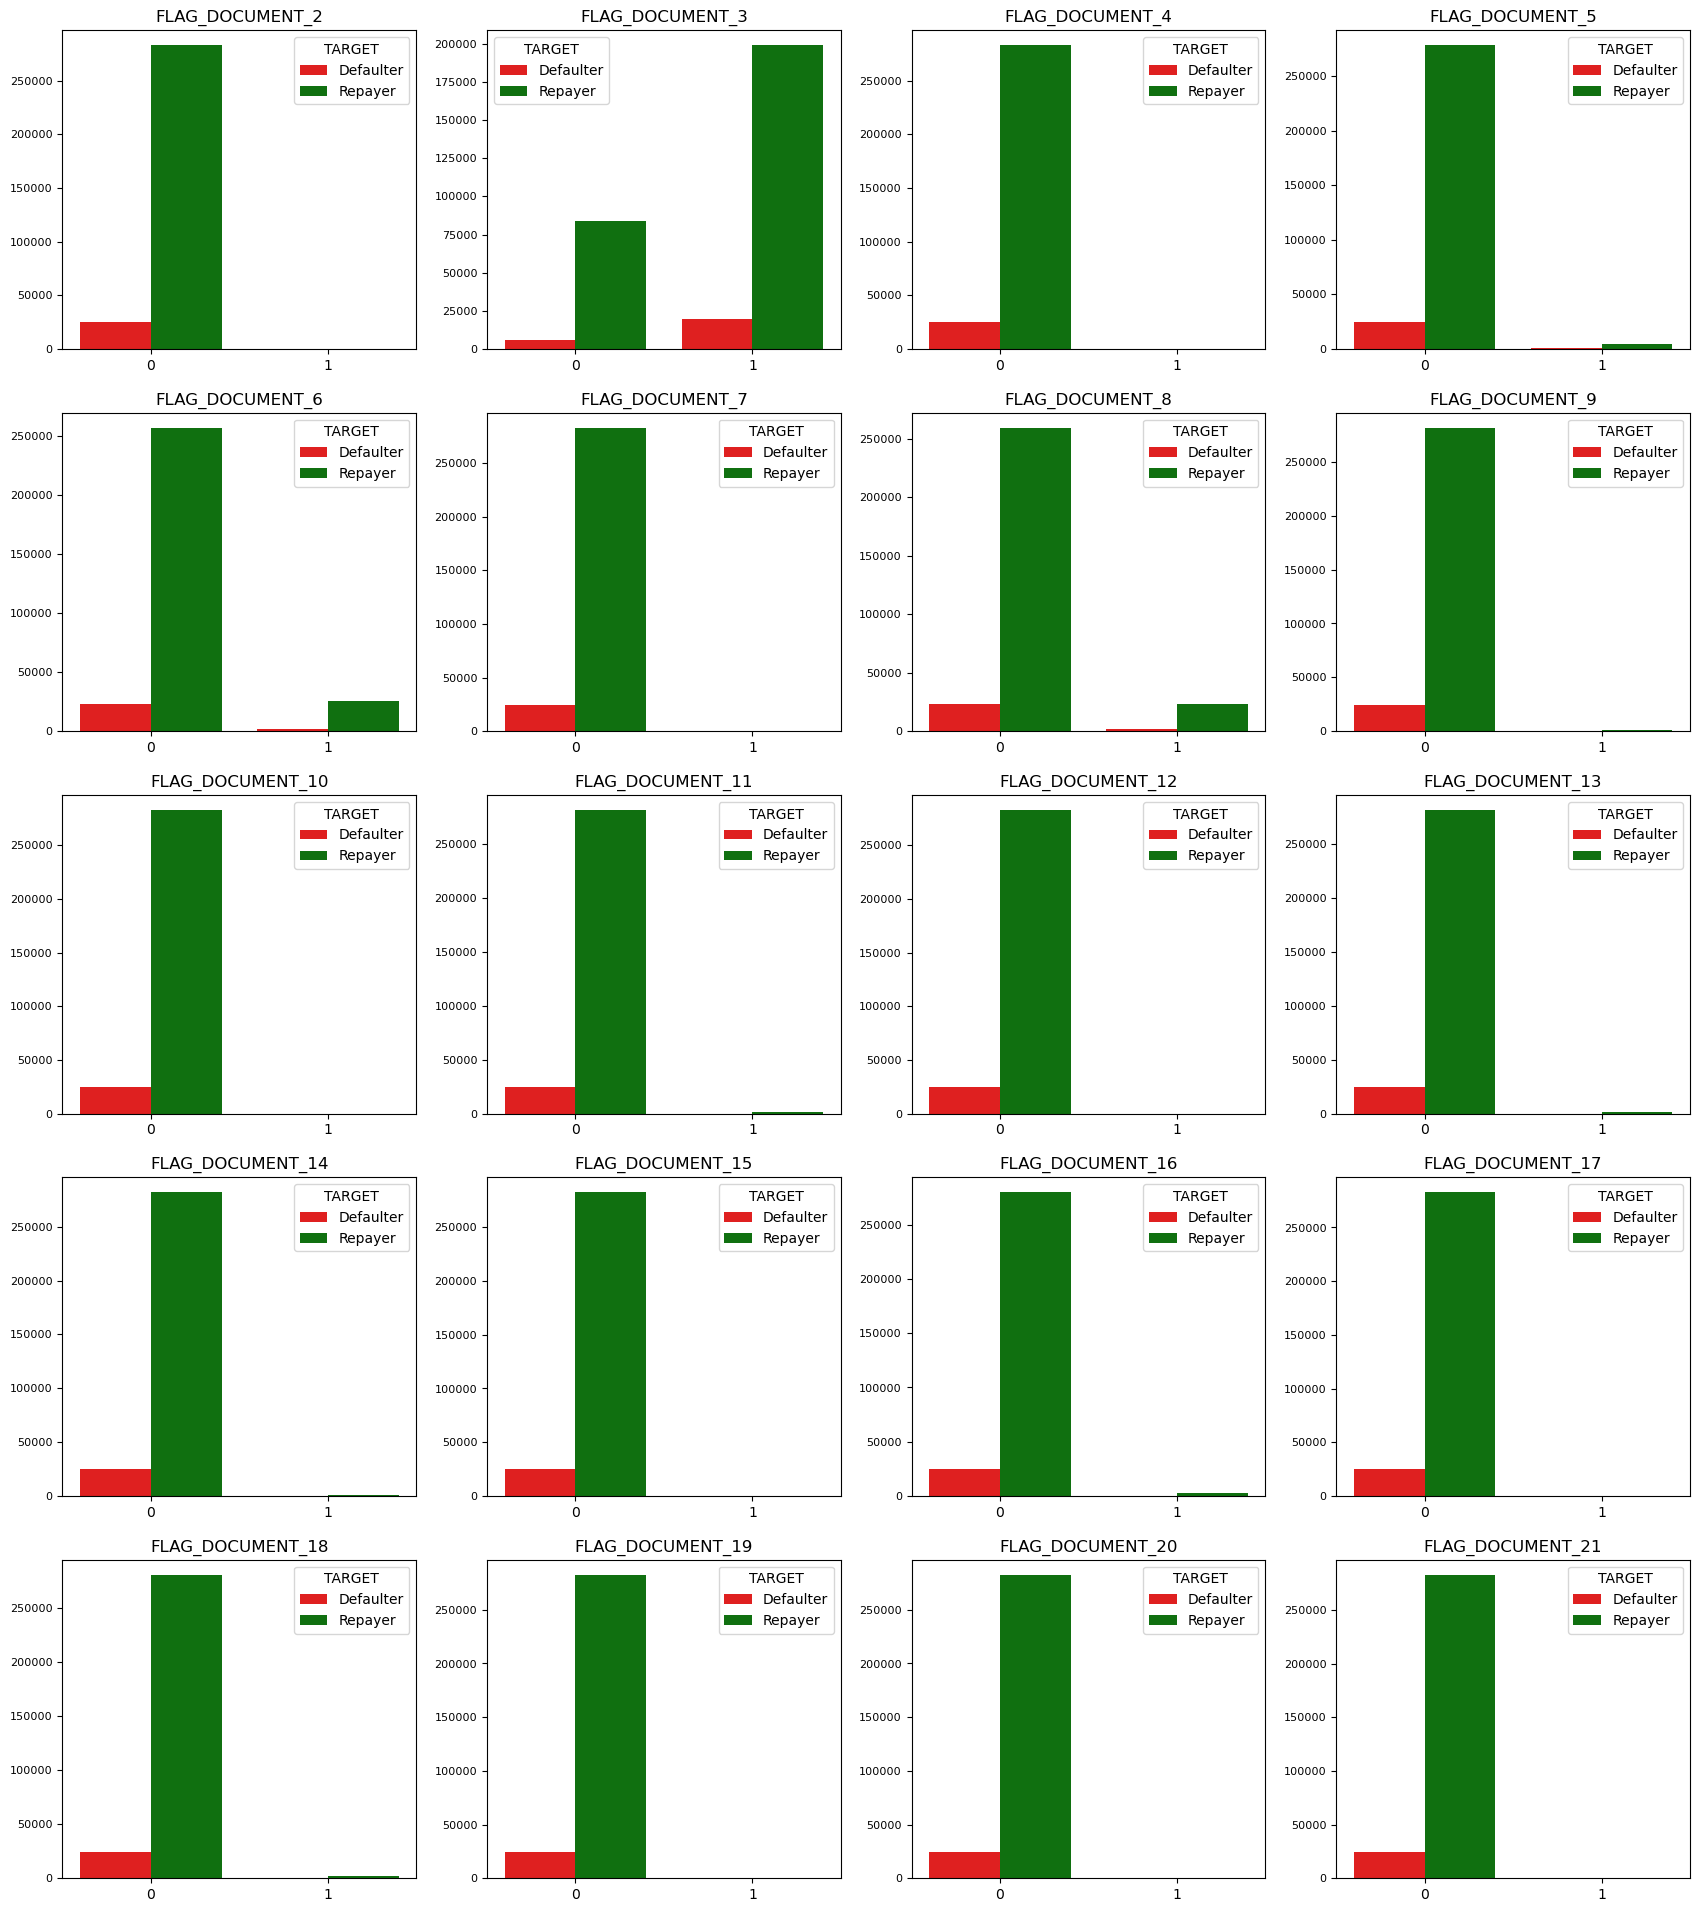

In [24]:
#Checking the relevance of Flag_Document and whether it has any relation with loan repayment status

col_doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
          'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
          'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
          'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21']

df_flag = application_df[col_doc+["TARGET"]]

length = len(col_doc)

df_flag["TARGET"]= df_flag["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_doc, range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(x=df_flag[i],hue=df_flag["TARGET"], palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

Insight:
The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [25]:
#Including the flag documents for dropping the Document columns
col_doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_doc
len(Unwanted_application)

70

## Contact Parameters

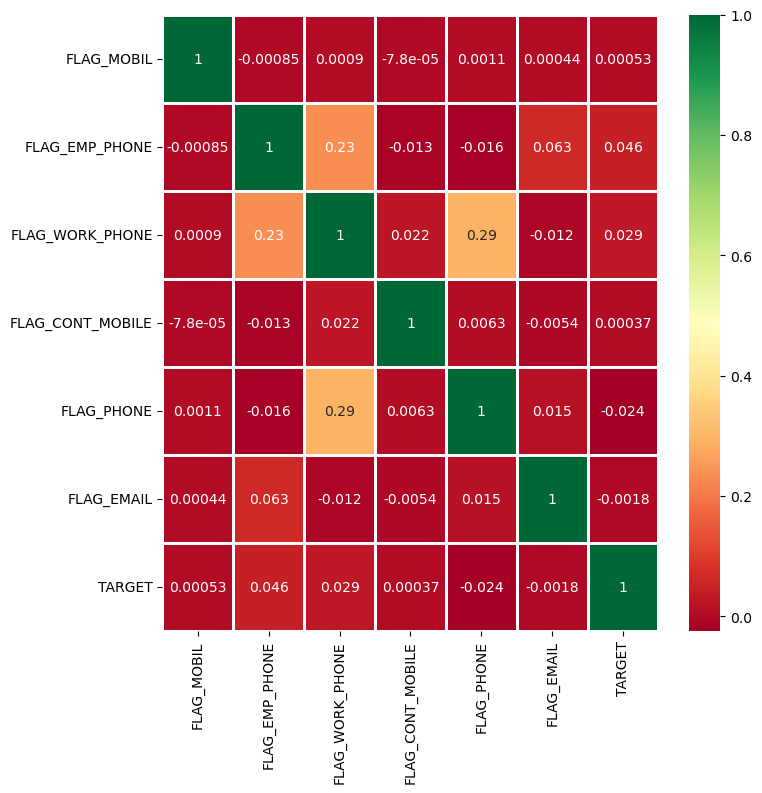

In [26]:
#Checking if there is any correlation between mobile phone, work phone, etc.
#email, Family members and Region rating

contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
              'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr = application_df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(contact_corr,
                xticklabels = contact_corr.columns,
                yticklabels = contact_corr.columns,
                annot = True,
                cmap = "RdYlGn",
                linewidth =1)

Insight:
There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [27]:
#Including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

Insight:
Total 76 columns can be deleted from application_df

In [28]:
#Dropping the unnecessary columns from application_df
application_df.drop(labels = Unwanted_application, axis=1, inplace=True)


In [29]:
#Inspecting the dataframe after removal of unnecessary columns
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3      100006       0         Cash loans           F            N               Y  

In [30]:
#inspecting the columns types after removal of unnecessary columns
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Insight:
After deleting unnecessary columns, there are 46 columns remaining in applicationDF

In [ ]:
## Analyze & Delete Unnecessary columns in previous_df

In [31]:
#Getting the 11 columns which has more than 40% unknown 
Unwanted_previous = null_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [32]:
#Listing down columns which are not needed
unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                      'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [33]:
Unwanted_previous = Unwanted_previous+ unnecessary_previous
len(Unwanted_previous)

15

Insight:
Total 15 columns can be deleted from previous_df

In [34]:
#Dropping the unnecessary columns from previous
previous_df.drop(labels=Unwanted_previous, axis=1, inplace=True)

#Inspecting the dataframe after removal of unnecessary columns
previous_df.shape

(1670214, 22)

In [35]:
#inspecting the columns types after removal of unnecessary columns
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

Insight:
After deleting unnecessary columns, there are 22 columns remaining in application_df

## Standardize Values

Strategy for application_df:
- Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.
- Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns
- Categorize the amount variables into bins
- Convert region rating column and few other columns to categorical

In [36]:
#converting negative days to positive days

date_col = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

for col in date_col:
    application_df[col]=abs(application_df[col])

In [37]:
#binning numerical columns to create a categorical column

#creating bins for income amount
application_df['AMT_INCOME_TOTAL']=application_df['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]

slot = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K',
       '500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M Above']

application_df['AMT_INCOME_RANGE']=pd.cut(application_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [38]:
application_df['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.735000
200K-300K    21.210691
0-100K       20.729695
300K-400K     4.776116
400K-500K     1.744669
500K-600K     0.356354
600K-700K     0.282805
800K-900K     0.096980
700K-800K     0.052721
900K-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

Insight:
More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [39]:
#creating bins for credit amount
application_df['AMT_CREDIT']=application_df['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]

slots = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K',
       '500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M Above']

application_df['AMT_CREDIT_RANGE']=pd.cut(application_df['AMT_CREDIT'], bins=bins, labels=slots)

In [40]:
#checking the binning of data and % of data in each category

application_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200K-300K    17.824728
1M Above     16.254703
500K-600K    11.131960
400K-500K    10.418489
100K-200K     9.801275
300K-400K     8.564897
600K-700K     7.820533
800K-900K     7.086576
700K-800K     6.241403
900K-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

Insight:
More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [41]:
#creating bins for age

application_df['AGE']=application_df['DAYS_BIRTH']//365
bins = [0,20,30,40,50,100]
slots= ['0-20','20-30','30-40','40-50','50 above']

application_df['AGE_GROUP']=pd.cut(application_df['AGE'], bins=bins, labels=slots)

In [42]:
#checking the binning of data and % of data in each category
application_df['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

Insight:
31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [43]:
#creating bins for employment time
application_df['YEARS_EMPLOYED']=application_df['DAYS_EMPLOYED']//365

bins= [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_df['EMPLOYMENT_YEAR'] = pd.cut(application_df['YEARS_EMPLOYED'],
                                           bins=bins, labels=slots, right=False)


In [44]:
#checking the binning of data and % of data in each category
application_df['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5         54.044825
5-10        25.736009
10-20       15.238541
20-30        3.788417
30-40        1.099402
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

Insight:
More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

In [45]:
#checking the number of unique values each column possess to identify categorical columns
application_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

## Data type conversion

In [46]:
#inspecting the column types if they are in correct data type
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Insight:
Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [47]:
#conversion of Object and numerical columns to categorical columns

categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','NAME_TYPE_SUITE',
                   'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                   'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                   'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                   'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                   'REGION_RATING_CLIENT_W_CITY']

for col in categorical_cols:
    application_df[col]=pd.Categorical(application_df[col])

In [48]:
#inspecting the column types if th above conversion is reflected
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## Standardize values for previous_df

Strategy for previous_df:
- Convert DAYS_DECISION from negative to positive values and create categorical bins columns.
- Convert loan purpose and few other columns to categorical.

In [49]:
#checking the number of unique values each column possess to identify categorical cols
previous_df.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [50]:
#inspecting the column types if the above conversion is reflected
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [51]:
#converting negative days to positive days
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'])

In [52]:
#age group calculation e.g. 988 will be grouped as 800-1200, we are taking 400 as interval
previous_df['DAYS_DECISION_GROUP'] = (previous_df['DAYS_DECISION']-
                                      (previous_df['DAYS_DECISION']%400)).astype(str)+'-'+((previous_df['DAYS_DECISION']-
                                                                                           (previous_df['DAYS_DECISION']%400))+
                                                                                          (previous_df['DAYS_DECISION']%400)+(400-(previous_df['DAYS_DECISION']%400))).astype(str)

In [53]:
previous_df['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

Insight:
Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [54]:
#converting categorical columns from object to categorical
categorical_col_prev = ['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
                       'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE',
                       'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
                       'CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                       'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in categorical_col_prev:
    previous_df[col] = pd.Categorical(previous_df[col])

In [55]:
#inspecting the column types after conversion
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

# Null value data imputation

### Imputing null values in application_df

In [56]:
#checking the null value % of each column in application_df dataframe

round(application_df.isnull().sum()/application_df.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Cateogrical Variable "NAME_TYPE_SUITE" has lower percentage of null values, hence we use mode() to impute values

In [57]:
application_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [58]:
application_df['NAME_TYPE_SUITE'].fillna((application_df['NAME_TYPE_SUITE'].mode()[0]), inplace =True)

'OCCUPATION_TYPE' has higher percentage of null values, hence we create a new category to fill in null places

In [59]:
application_df['OCCUPATION_TYPE'] = application_df['OCCUPATION_TYPE'].cat.add_categories('Unknown')
application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

Checking the numerical data description using describe function

In [60]:
application_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()


AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

Here we have no outliers as the results of mean have decimal values and these columns represent number of enquiries made which cannot be decimal. Hence we use median to fill up the null values.

In [61]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for column in amount:
    application_df[column].fillna(application_df[column].median(), inplace= True)

## Now fixing previous_df

Checking the final null value % of each column in application_df dataframe

In [62]:
round(application_df.isnull().sum() / application_df.shape[0] *100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

We can ignore the columns with 0.33% null values as these are less significant percentages. 

The issue with EMPLOYMENT_YEAR having high null values is due to the unrealistic values in DAYS_EMPLOYED columns of the application_df which is consistently 1000 years for some entries of 50 above AGE_GROUP. Due to this their EMPLOYMENT_YEAR is NaN.

We fix this by imputing the null values with the average years employed for 50 above age group.

In [63]:
# Filter the "50 above" age group
fifty_above = application_df[application_df['AGE_GROUP'] == '50 above']

# Calculate the mean years employed for the "50 above" category, excluding 1000 values
mean_years_employed = fifty_above.loc[fifty_above['YEARS_EMPLOYED'] != 1000, 'YEARS_EMPLOYED'].mean()

# Replace 1000 years with the mean
application_df['YEARS_EMPLOYED'] = application_df['YEARS_EMPLOYED'].astype(int)
application_df.loc[(application_df['AGE_GROUP'] == '50 above') & (application_df['YEARS_EMPLOYED'] == 1000), 'YEARS_EMPLOYED'] = round(mean_years_employed)

# Update the 'EMPLOYMENT_YEAR' column based on the corrected 'YEARS_EMPLOYED'
bins = [0, 5, 10, 20, 30, 40, 50, 150]
slots = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50 above']

application_df['EMPLOYMENT_YEAR'] = pd.cut(application_df['YEARS_EMPLOYED'],
                                           bins=bins, labels=slots, right=False)


In [64]:
round(application_df.isnull().sum() / application_df.shape[0] *100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

We have now reasonably clean data

## Imputing values in previous_df

In [65]:
round(previous_df.isnull().sum() / previous_df.shape[0]*100, 2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

##### Strategy to impute null values in previous_df

- To impute null values in numerical column, we analysed the loan status and assigned values.
- To impute null values in continuous variables, we plotted the distribution of the columns and used
   - median if the distribution is skewed
   - mode if the distribution pattern is preserved.

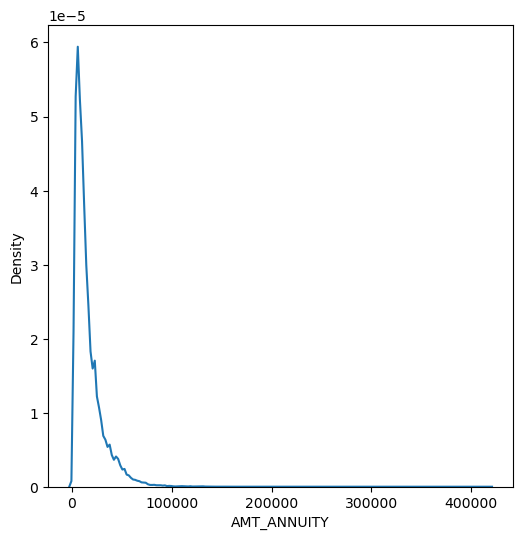

In [66]:
# Imputing amount annuity
plt.figure(figsize=(6,6))
sns.kdeplot(previous_df['AMT_ANNUITY'])
plt.show()

Insight: 
    Since the distribution of values has only one peak to one side, taking mean or mode for imputing null values won't be the right approach. Hence, we use median.

In [67]:
previous_df['AMT_ANNUITY'].fillna(previous_df['AMT_ANNUITY'].median(), inplace=True)

In [68]:
round(previous_df.isnull().sum() / previous_df.shape[0]*100,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY                0.00
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

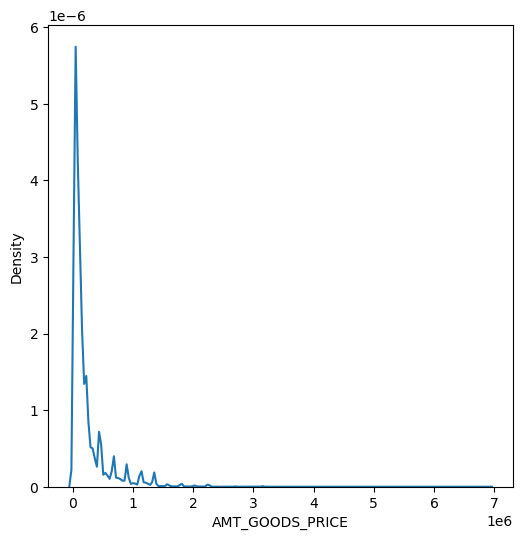

In [69]:
#visualising AMT_GOODS_PRICE

plt.figure(figsize=(6,6))
sns.kdeplot(previous_df['AMT_GOODS_PRICE'])
plt.show()

There are several peaks along the distribution. We'll impute using the mode, mean and median and see if the distribution is still about the same.

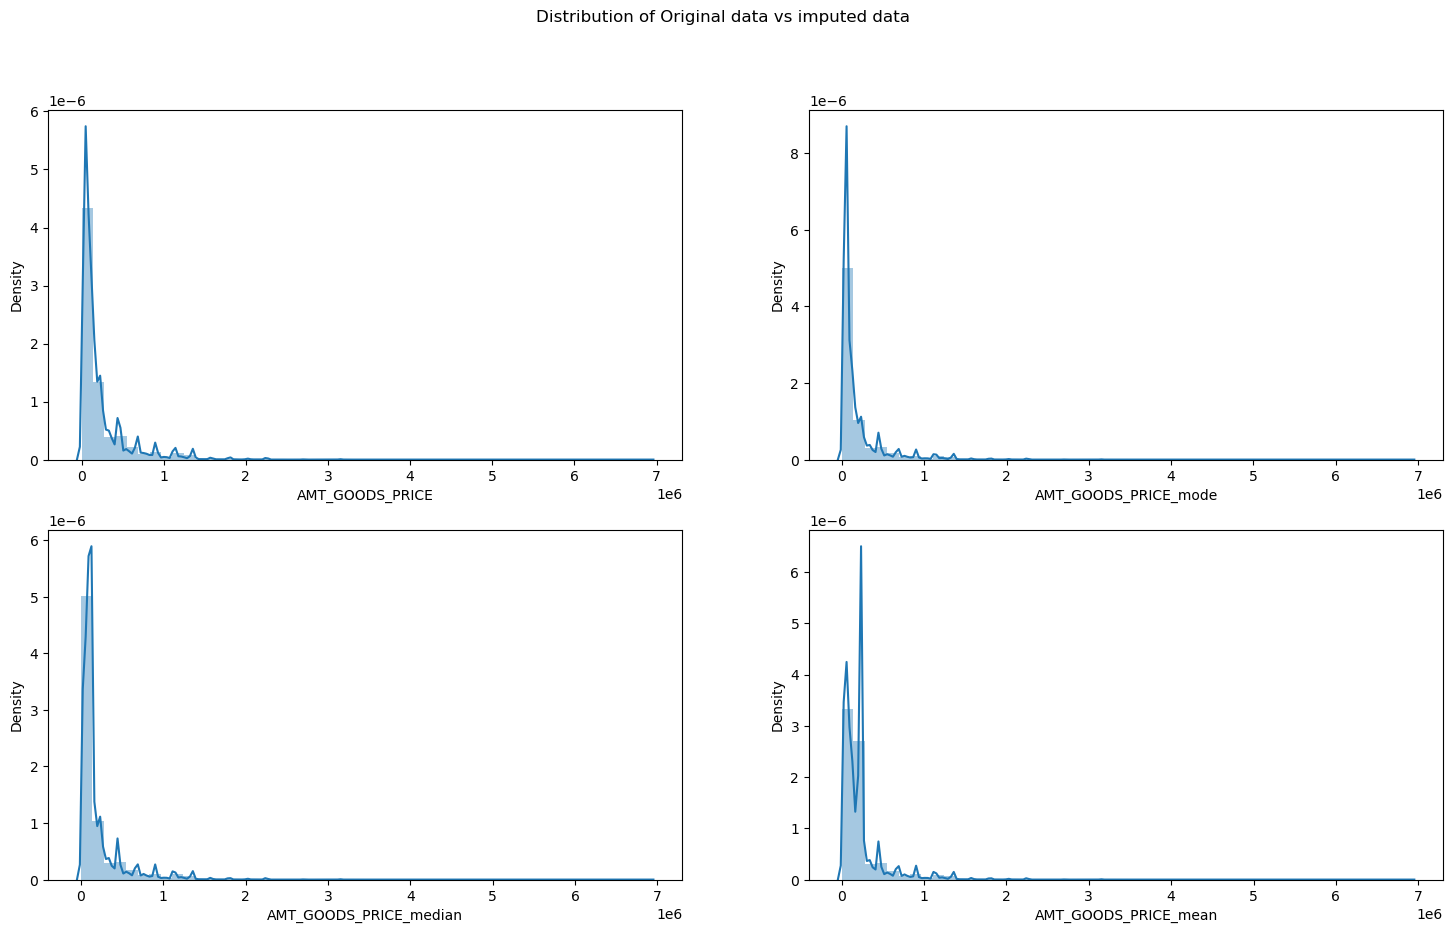

In [70]:
stats_df = pd.DataFrame() #new dataframe with columns imputed with mode,
#median and mean

stats_df['AMT_GOODS_PRICE_mode'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0])
stats_df['AMT_GOODS_PRICE_median'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].median())
stats_df['AMT_GOODS_PRICE_mean'] = previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median', 'AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previous_df['AMT_GOODS_PRICE'])
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(stats_df[i[1]])


Insight:
The original distribution is closer with the distribution of data imputed with mode in this case

In [71]:
previous_df['AMT_GOODS_PRICE'].fillna(previous_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [72]:
previous_df.loc[previous_df['CNT_PAYMENT'].isnull(), 'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

On closer look of the CNT_PAYMENT column, null values are those whose NAME_CONTRACT_STATUS indicate loans were not started. Hence, we can impute 0 here

In [73]:
previous_df['CNT_PAYMENT'].fillna(0, inplace=True)

In [74]:
#checking the null value % of each column in previous_df dataframe
round(previous_df.isnull().sum()/ previous_df.shape[0] *100, 2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

Insight: We can ignore the PRODUCT_COMBINATION null values since the percantage is very low

## Identifying Outliers

### Finding outlier information in application df

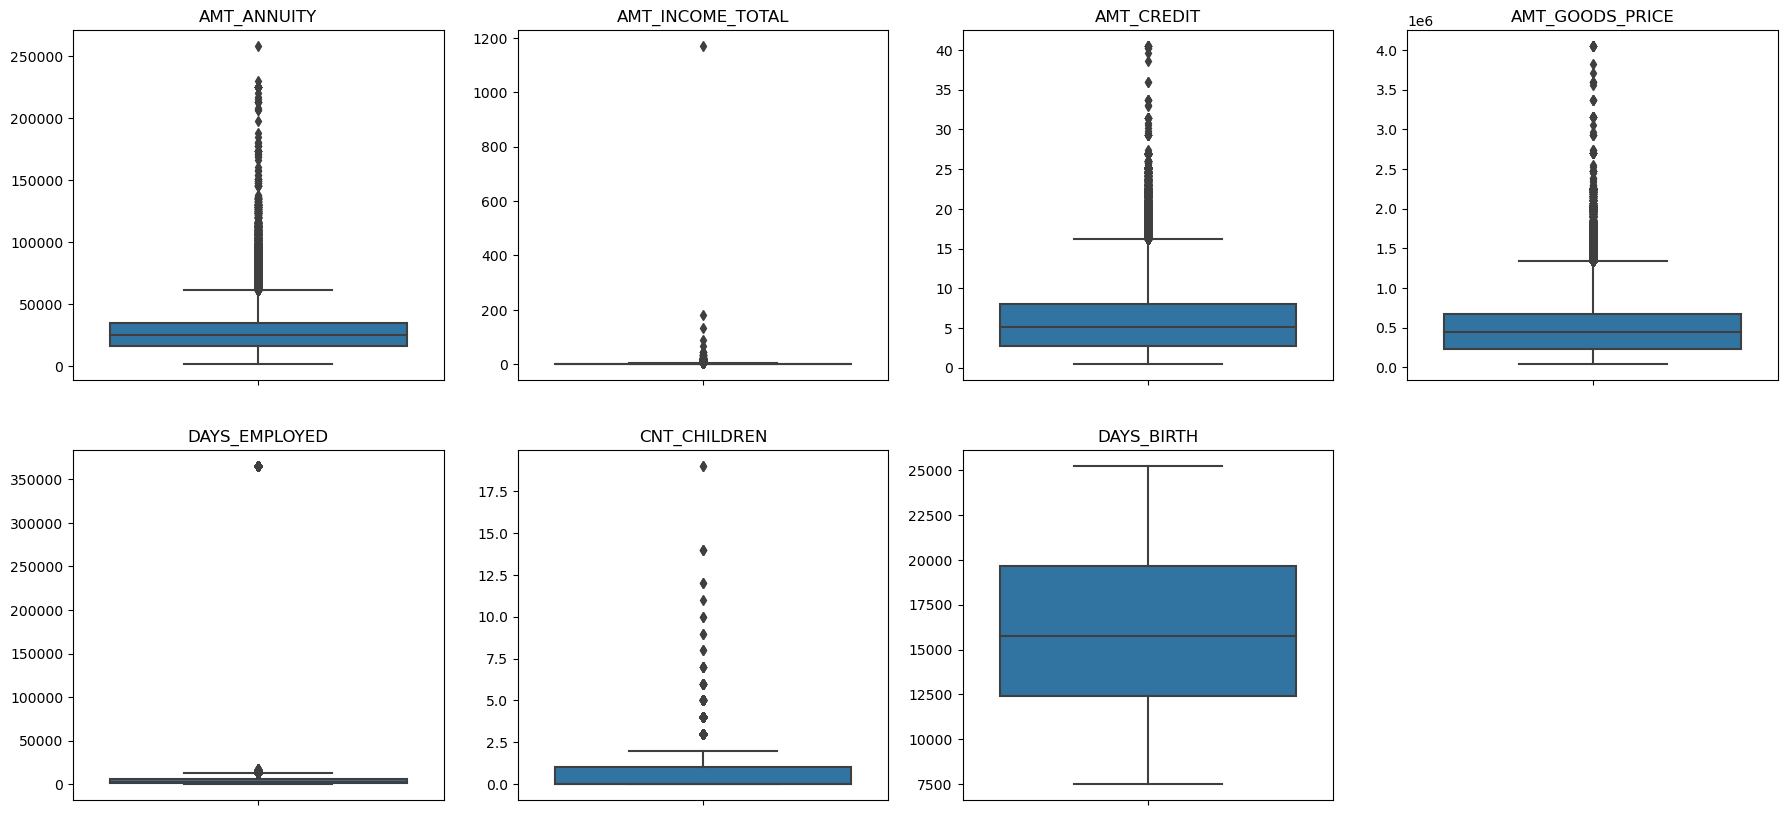

In [75]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN', 'DAYS_BIRTH']

for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Insight:
    
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN have some number of ouliers.
- AMT_INCOME_TOTAL has huge number of outliers indicating few loan applications have high income when compared to the others.
- DAYS_BIRTH has no outliers hence the data is reliable.
- DAYS_EMPLOYED has outlier values around 350000 (days) which is around 958 years which is impossible and hence this has to be incorrect entry. This also caused the null value issue previously in EMPLOYMENT_YEAR column

In [76]:
application_df[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_BIRTH', 'CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE     DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED
count  307499.000000     307511.000000  307511.000000     3.072330e+05  307511.000000  307511.000000  307511.000000
mean    27108.573909          1.687979       5.990260     5.383962e+05   16036.995067       0.417052   67724.742149
std     14493.737315          2.371231       4.024908     3.694465e+05    4363.988632       0.722121  139443.751806
min      1615.500000          0.256500       0.450000     4.050000e+04    7489.000000       0.000000       0.000000
25%     16524.000000          1.125000       2.700000     2.385000e+05   12413.000000       0.000000     933.000000
50%     24903.000000          1.471500       5.135310     4.500000e+05   15750.000000       0.000000    2219.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05   19682.000000       1.000000    5707.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06   25229.000000      19.000000  365243.000000

### Finding outlier information in previous_df

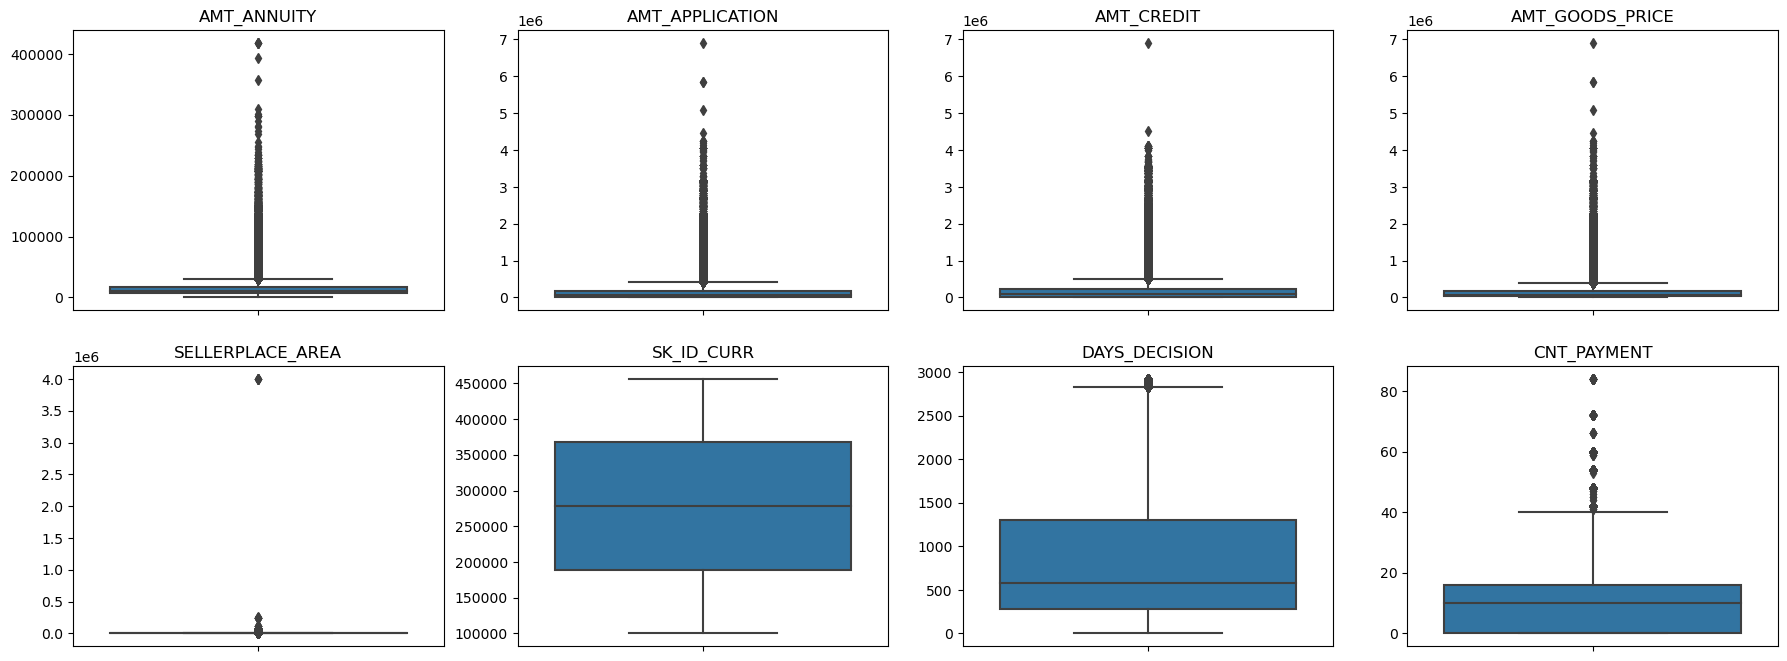

In [77]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR', 'DAYS_DECISION', 'CNT_PAYMENT']

for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")
    
for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_df[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Insight: It can be seen that in previous application data
- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, - SELLERPLACE_AREA have huge number of outliers.
- CNT_PAYMENT has few outlier values.
- SK_ID_CURR is an ID column and hence no outliers.
- DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.

In [78]:
previous_df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','DAYS_DECISION', 'CNT_PAYMENT']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA  DAYS_DECISION   CNT_PAYMENT
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06      1.670214e+06   1.670214e+06  1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05      3.139511e+02   8.806797e+02  1.247621e+01
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05      7.127443e+03   7.790997e+02  1.447588e+01
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00   1.000000e+00  0.000000e+00
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04     -1.000000e+00   2.800000e+02  0.000000e+00
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04      3.000000e+00   5.810000e+02  1.000000e+01
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05      8.200000e+01   1.300000e+03  1.600000e+01
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06      4.000000e+06   2.922000e+03  8.400000e+01

## Data Analysis

Strategy:
The data analysis flow has been planned in following way :

- Imbalance in Data
- Categorical Data Analysis
     - Categorical segmented Univariate Analysis
     - Categorical Bi/Multivariate analysis
- Numeric Data Analysis
     - Bi-furcation of databased based on TARGET data
     - Correlation Matrix
     - Numerical segmented Univariate Analysis
     - Numerical Bi/Multivariate analysis

### Imbalance Analysis

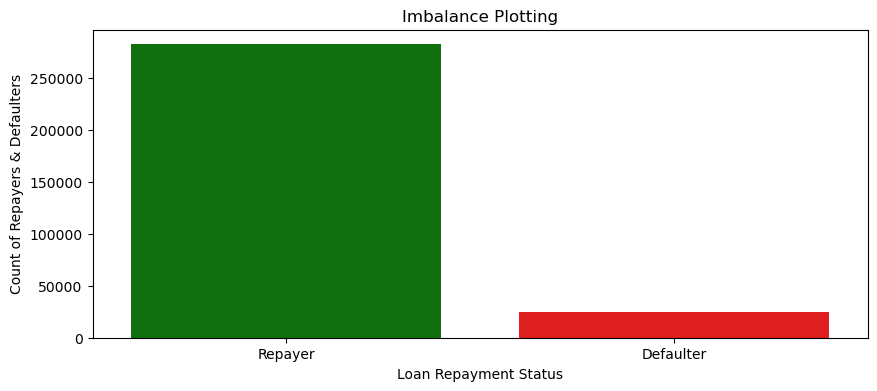

In [79]:
Imbalance = application_df['TARGET'].value_counts().reset_index()
Imbalance.columns = ['TARGET', 'Count'] 
Imbalance['TARGET'] = Imbalance['TARGET'].replace({ 0: "Repayer", 1: "Defaulter"})

plt.figure(figsize=(10, 4))
sns.barplot(x='TARGET', y='Count', data=Imbalance, palette=['g', 'r'])

plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [80]:
Imbalance = application_df['TARGET'].value_counts().reset_index()
Imbalance.columns = ['TARGET', 'Count'] 

count_0 = Imbalance.iloc[0]["Count"]
count_1 = Imbalance.iloc[1]["Count"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer & Defaulter data are: %.2f and %.2f' %(count_0_perc, count_1_perc))
print("Ratios of imbalance in relative with respect to Repayer & Defaulter data is %.2f : 1(approx)" %(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer & Defaulter data are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer & Defaulter data is 11.39 : 1(approx)


### Plotting Functions

In [81]:
#function for plotting repititive countplots in univariate categorical analysis on application_df
#This function will create two subplots:
#1. Count plot of cateogrical column w.r.t TARGET
#2. Percentage of defaulters within column

def univariate_categorical(feature, ylog=False, label_rotation=False, horizontal_layout=True):
    temp = application_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts' : temp.values})
    
    #Calculate the percentage of target =1 per category value
    cat_perc = application_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc['TARGET'] = cat_perc['TARGET']*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    #1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax = ax1, x=feature, data= application_df, hue = 'TARGET', order = cat_perc[feature], palette = ['g','r'])
    
    #Define common styling
    ax1.set_title(feature, fontdict={'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})
    ax1.legend(['Repayer', 'Defaulter'])
    
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel('Count (log)', fontdict = {'fontsize': 10, 'fontweight': 3, 'color': 'Blue'})
        
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax =ax2, x=feature, y='TARGET', order = cat_perc[feature], data=cat_perc, palette = 'Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel('Percent of Defaulter (%)', fontsize=10)
    plt.tick_params(axis='both', which ='major', labelsize=10)
    ax2.set_title(feature + 'Defaulter %', fontdict = {'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
    
    plt.show()

In [138]:
#function for plotting repititve countplots in bivariate categorical analysis

def bivariate_bar(x, y, df, hue, figsize):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y, data=df, hue=hue, palette={0: 'green', 1: 'red'})
    
    plt.xlabel(x, fontdict={'fontsize': 10, 'fontweight': 3, 'color':'Blue'})
    plt.ylabel(x, fontdict={'fontsize': 10, 'fontweight': 3, 'color':'Blue'})    
    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5, 'color':'Blue'})
    plt.xticks(rotation=90, ha='right')
    plt.legend()
    plt.show()

In [140]:
#functions for plotting repititve rel( relationship) plots in bivariate numerical analysis on application_df

def bivariate_rel(x, y, data, hue, kind, palette, legend, figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, y=y, data=application_df, hue='TARGET', kind=kind, palette={0: 'green', 1: 'red'}, legend = False)
    plt.legend({0:'Repayer', 1:'Defaulter'})
    plt.xticks(rotation=90, ha='right')
    plt.show()
    

In [84]:
#function for plotting repititive countplots in univariate categorical analysis on the merged df

def univariate_merged(col, df, hue, palette, ylog, figsize):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col, data=df, hue=hue, palette=palette, order=df[col].value_counts().index)
    
    if ylog:
        plt.yscale('log')
        plt.ylabel('Count (log)', fontdict={'fontsize': 10, 'fontweight': 3, 'color':'Blue'})
    else:
        plt.ylabel('Count', fontdict={'fontsize': 10, 'fontweight': 3, 'color':'Blue'})
    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5, 'color':'Blue'})
    plt.legend(loc='upper right')
    plt.xticks(rotation=90, ha='right')
                                            
    plt.show()

In [85]:
#function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, y=y, hue='TARGET', data=loan_process_df, palette=['g','r'])
    

## Categorical Variable Analysis

### Segemented Univariate Analysis

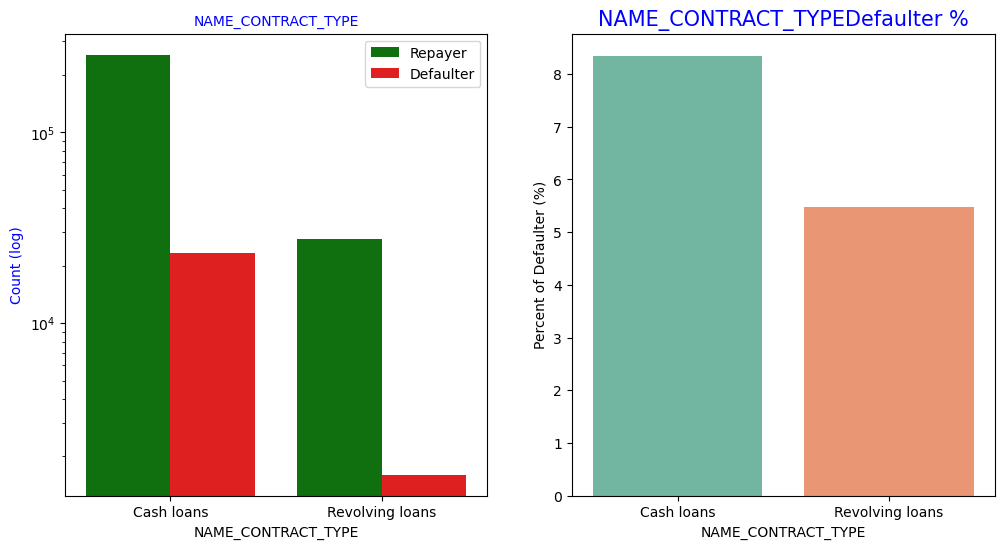

In [86]:
#Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE', True)

Insight: 
    
- Revolving loans are just a small fraction (10%) from the total number of loans. In the same time, a larger amount of Revolving loans, comparing with their frequency are not repaid.

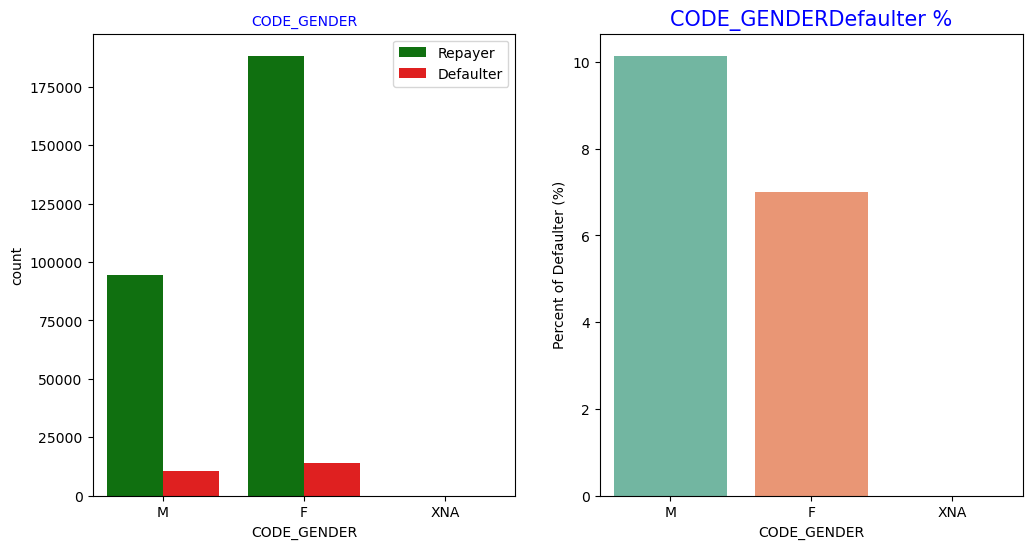

In [87]:
#checking the type of gender on loan repayment status
univariate_categorical('CODE_GENDER')

Insight:
- Number of female clients is almost double the male clients. Based on percentage of defaulted credits, males have higher chance of not reuturning their loan comapring with women.

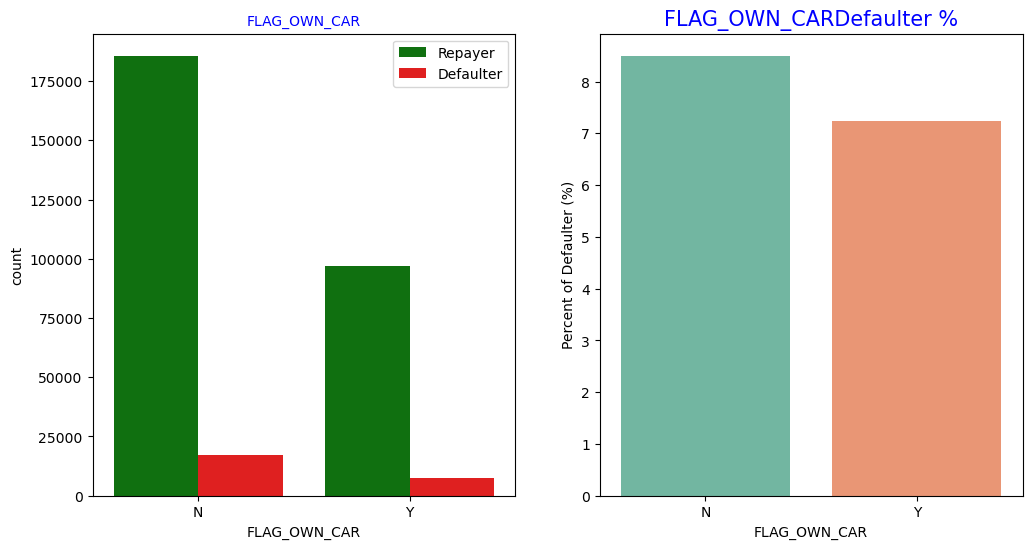

In [88]:
#checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

Insight:
    
- Client are more who don't own a car. But based on the percentage of default, there is no correlation between owning a car and loan repayment as the percentage is almost the same.

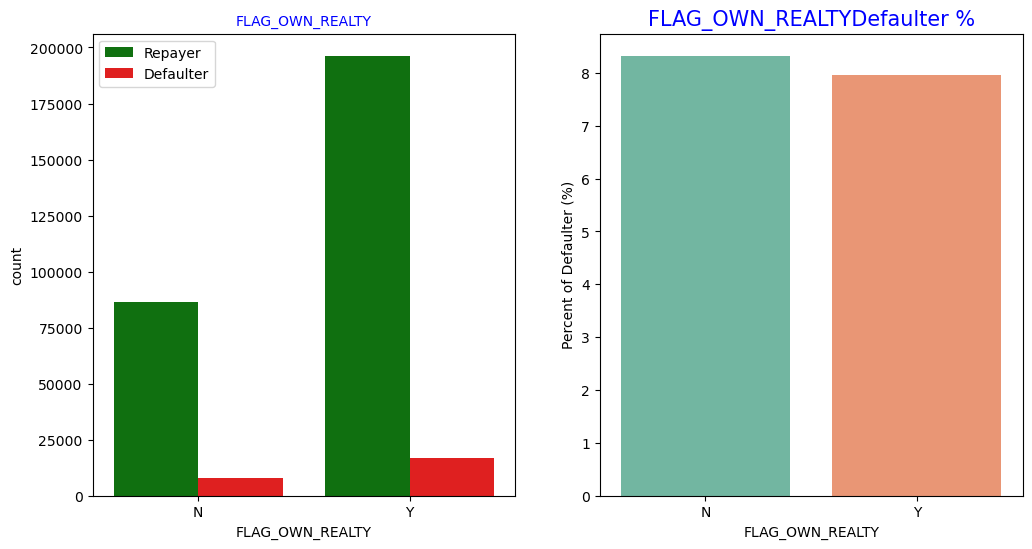

In [89]:
#Checking if owning a realty is relate to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

Insight:
- Cients who own a realty are almost double. However both have similar defaulting rate, hence there is no correlation between owning a realty and defaulting the loan.

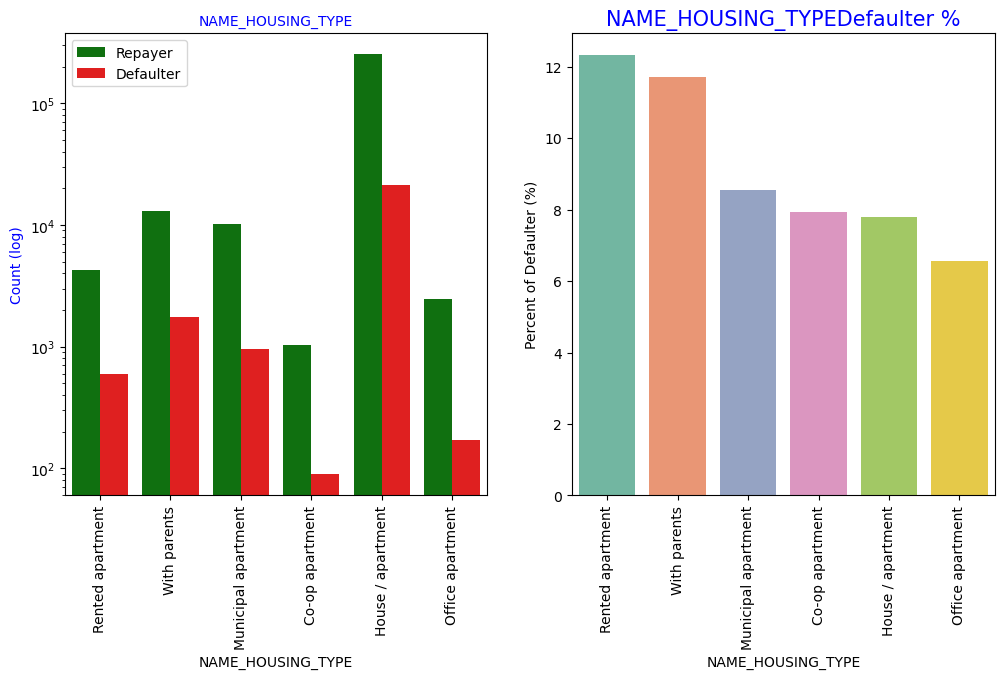

In [90]:
#Analyzing housing type based on loan repayment status

univariate_categorical('NAME_HOUSING_TYPE', True, True, True)

Insight:
- Majority of people live in House/apartment
- People living in office apartments have lowest default rate
- People living with parents (approx 11.5%) and living in rented apartments (>12%) have higher probability of defaulting

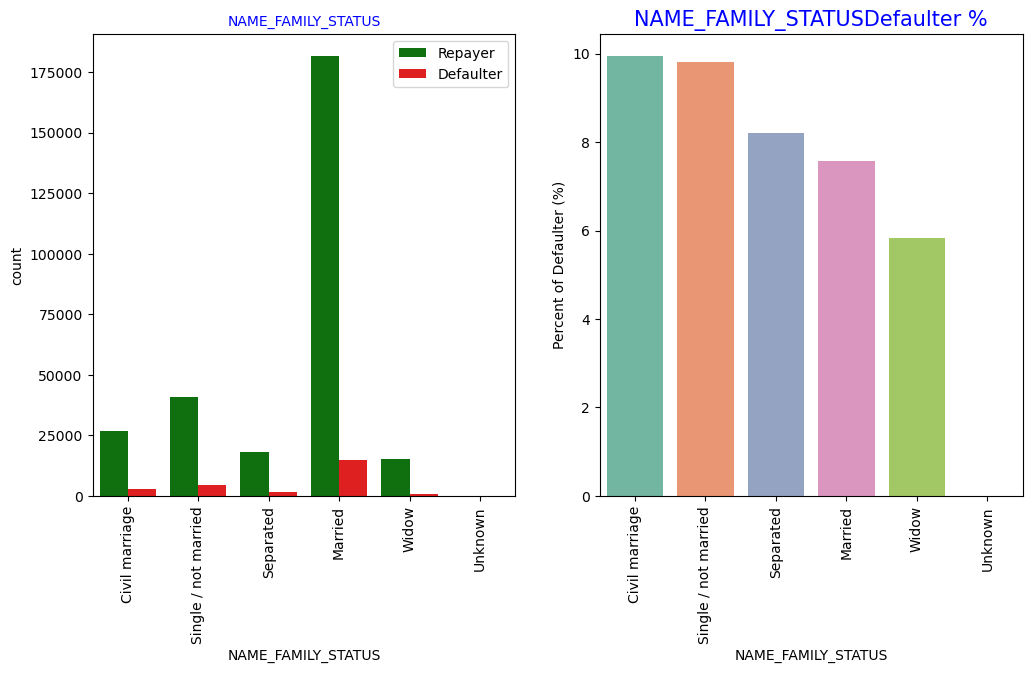

In [91]:
# Analyzing family status based on loan repayment status
univariate_categorical('NAME_FAMILY_STATUS', False, True, True)

Insight:
- Highest loan takers are from married category.
- In terms of defaulter percentage, Civil marriage has the highest default percentage (10%), with Widow the lowest.

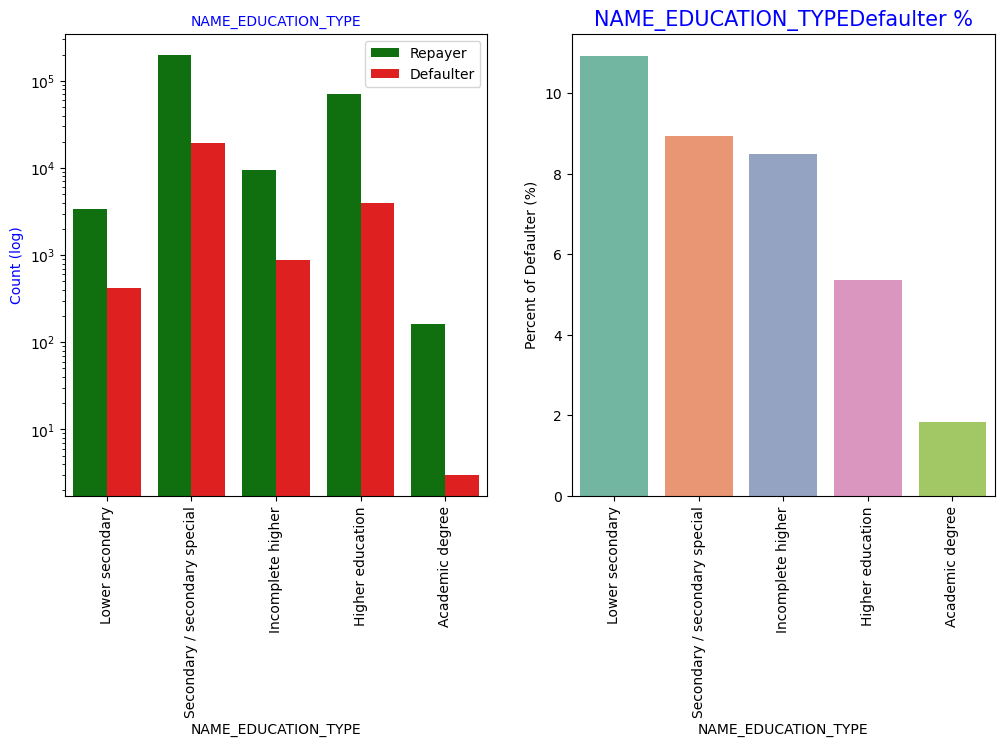

In [92]:
#Analyzing Education type based on loan repayment status
univariate_categorical('NAME_EDUCATION_TYPE', True, True, True)

Insight:
- Majority of clients have secondary/ secondary special education, followed by clients with higher education. 
- Lower secondary cateogry has the largest rate of defaulting (11%). Academic degree holders have lowest default rate (approx. 2%)

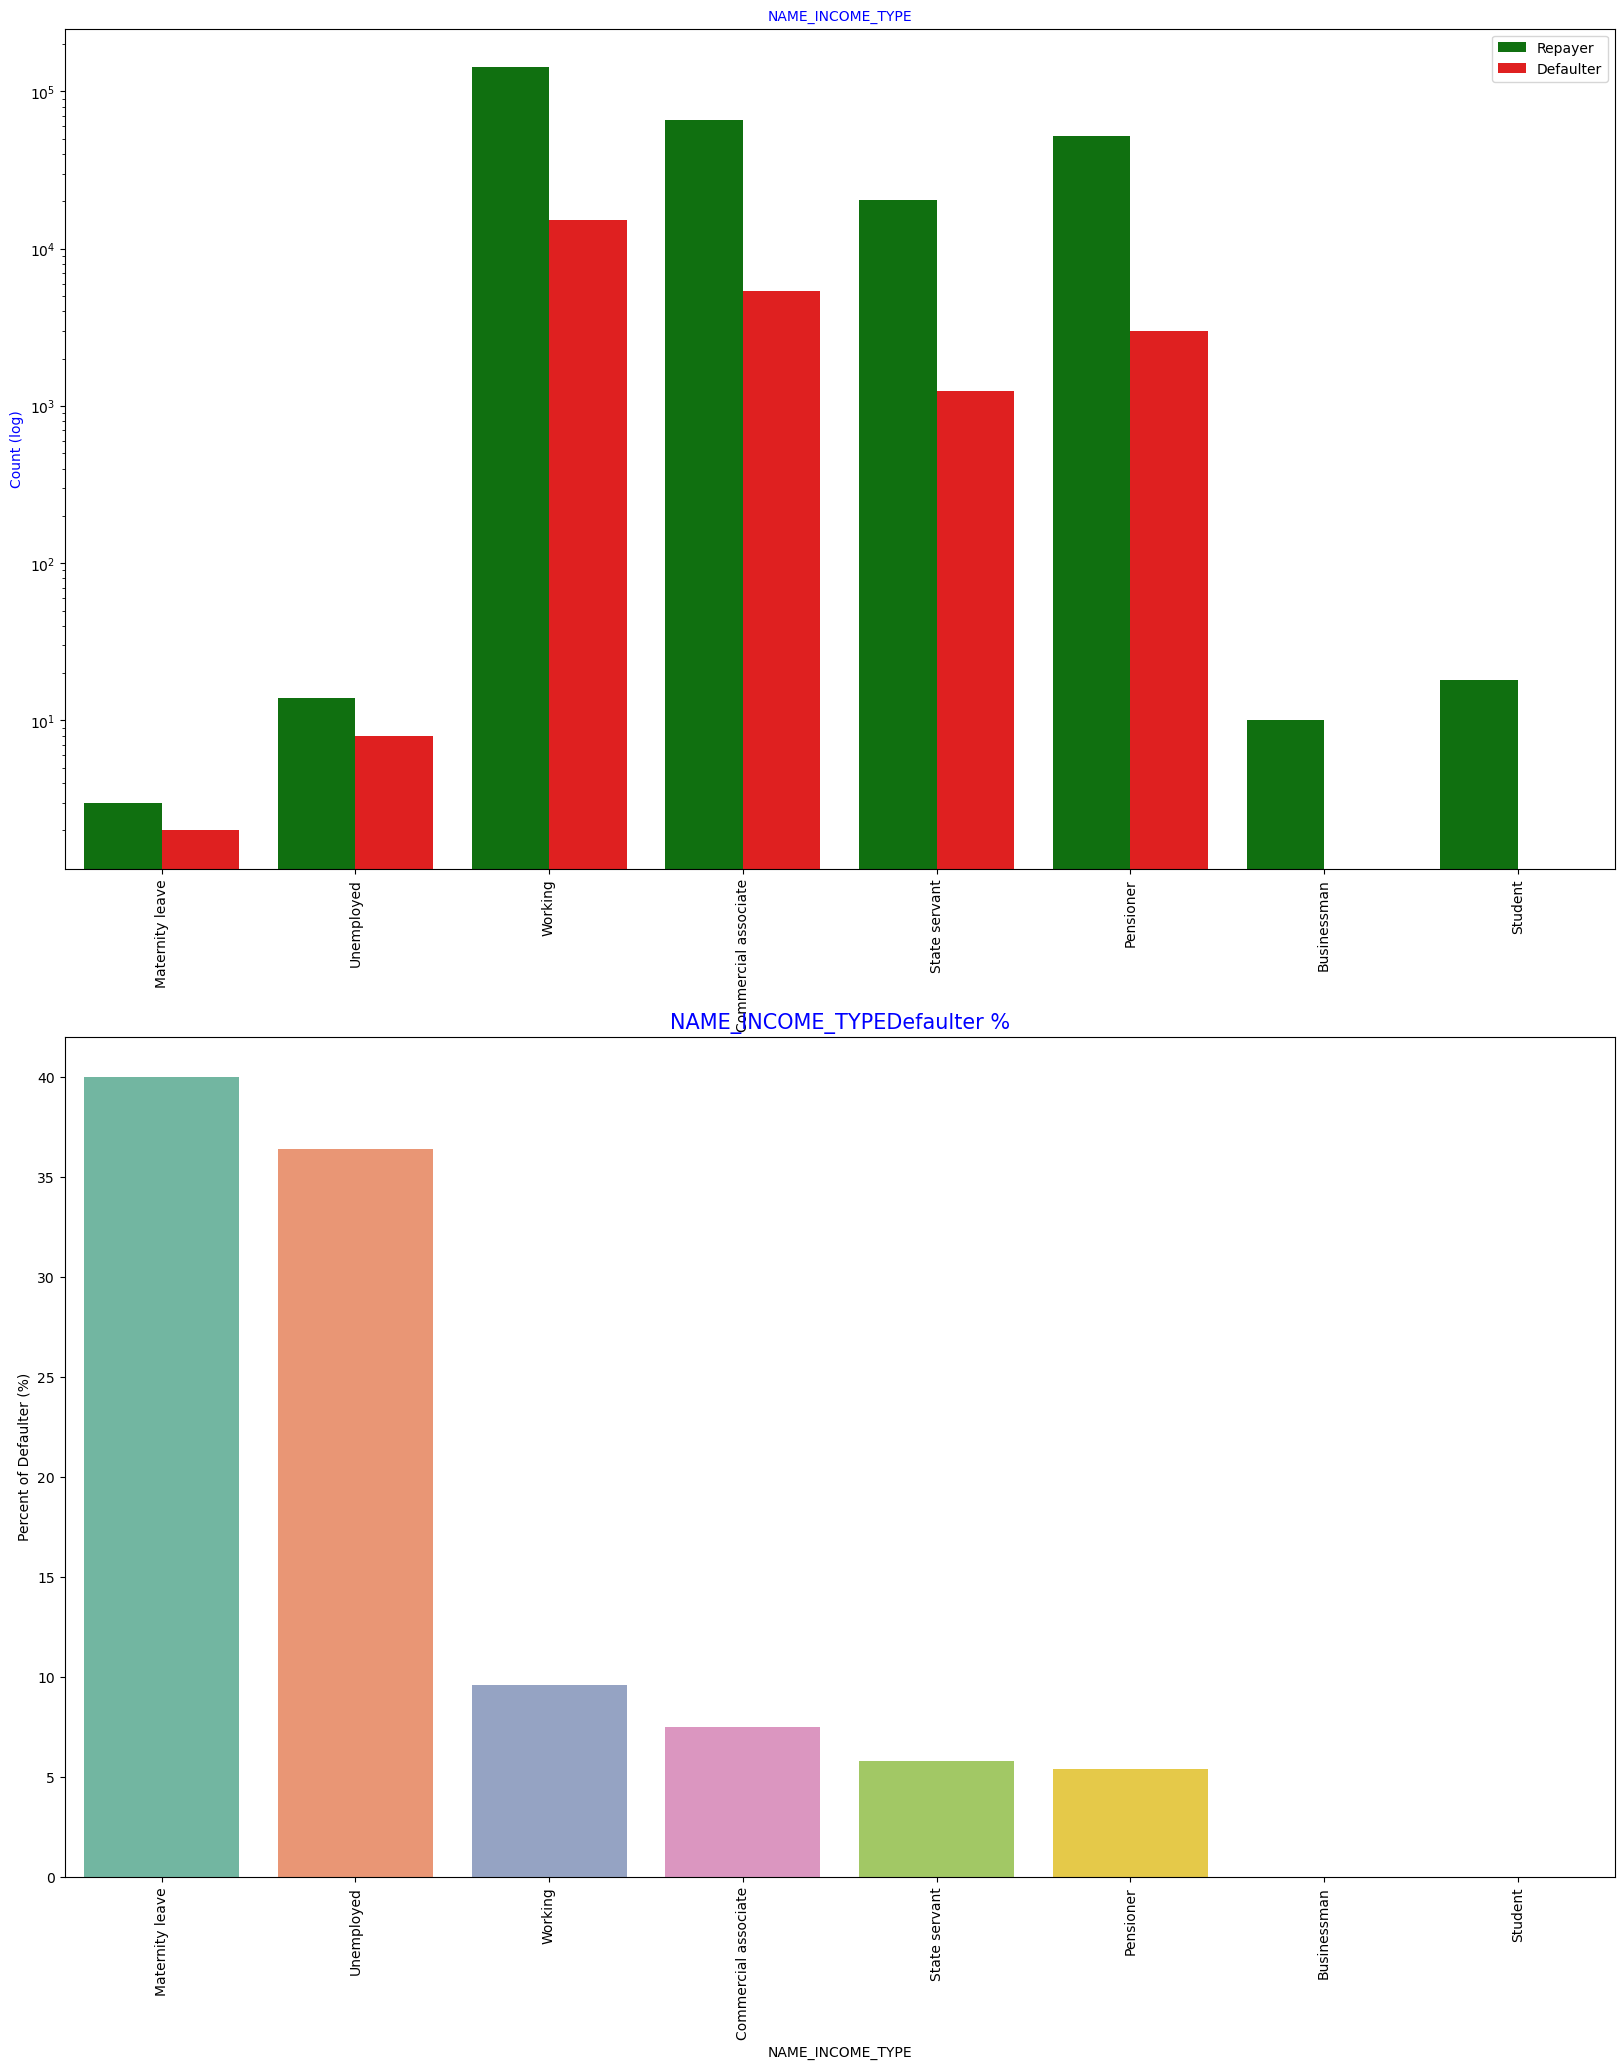

In [93]:
# Analyzing income type based on loan repayment status
univariate_categorical('NAME_INCOME_TYPE', True, True, False)

Insight:
- Most of the applicants have Working income type, followed closely by Commerical associate, pensioner and state servant.
- Applicants on maternity leave have highest defaulter percentage (40%), followed by unemployed (37%). Rest all are under 10%
- Students and businessmen even after being less in number, have no default rate. Hence they are the safest applicants.

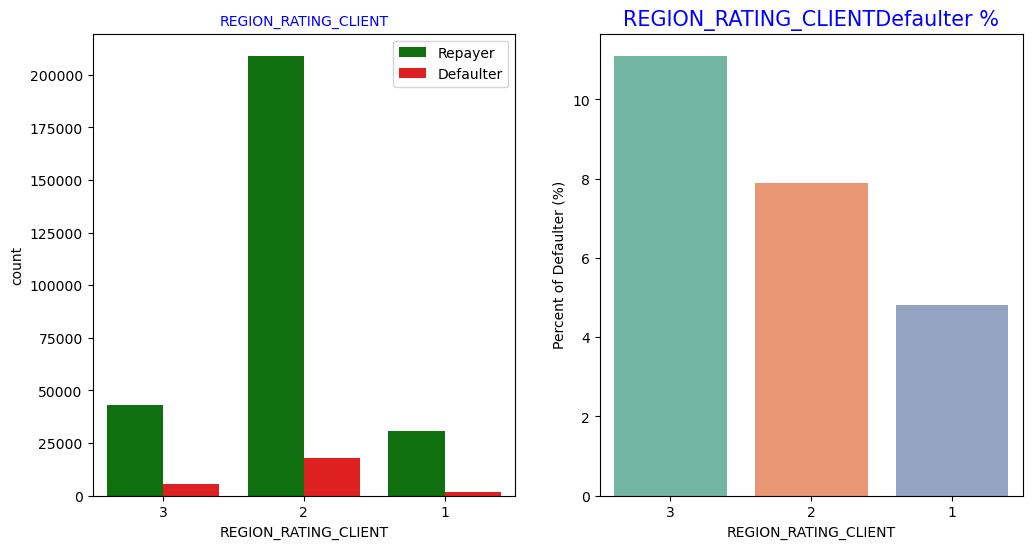

In [94]:
# Analyzing region rating where applicant lives based on loan repayment status

univariate_categorical('REGION_RATING_CLIENT', False, False, True)

Insight:
- Most of the applicants are living in Region_Rating 2 place.
- Region rating 3 has the highest default rate (11%).
- Region rating 1 has lowest default rate (approx. 5%).

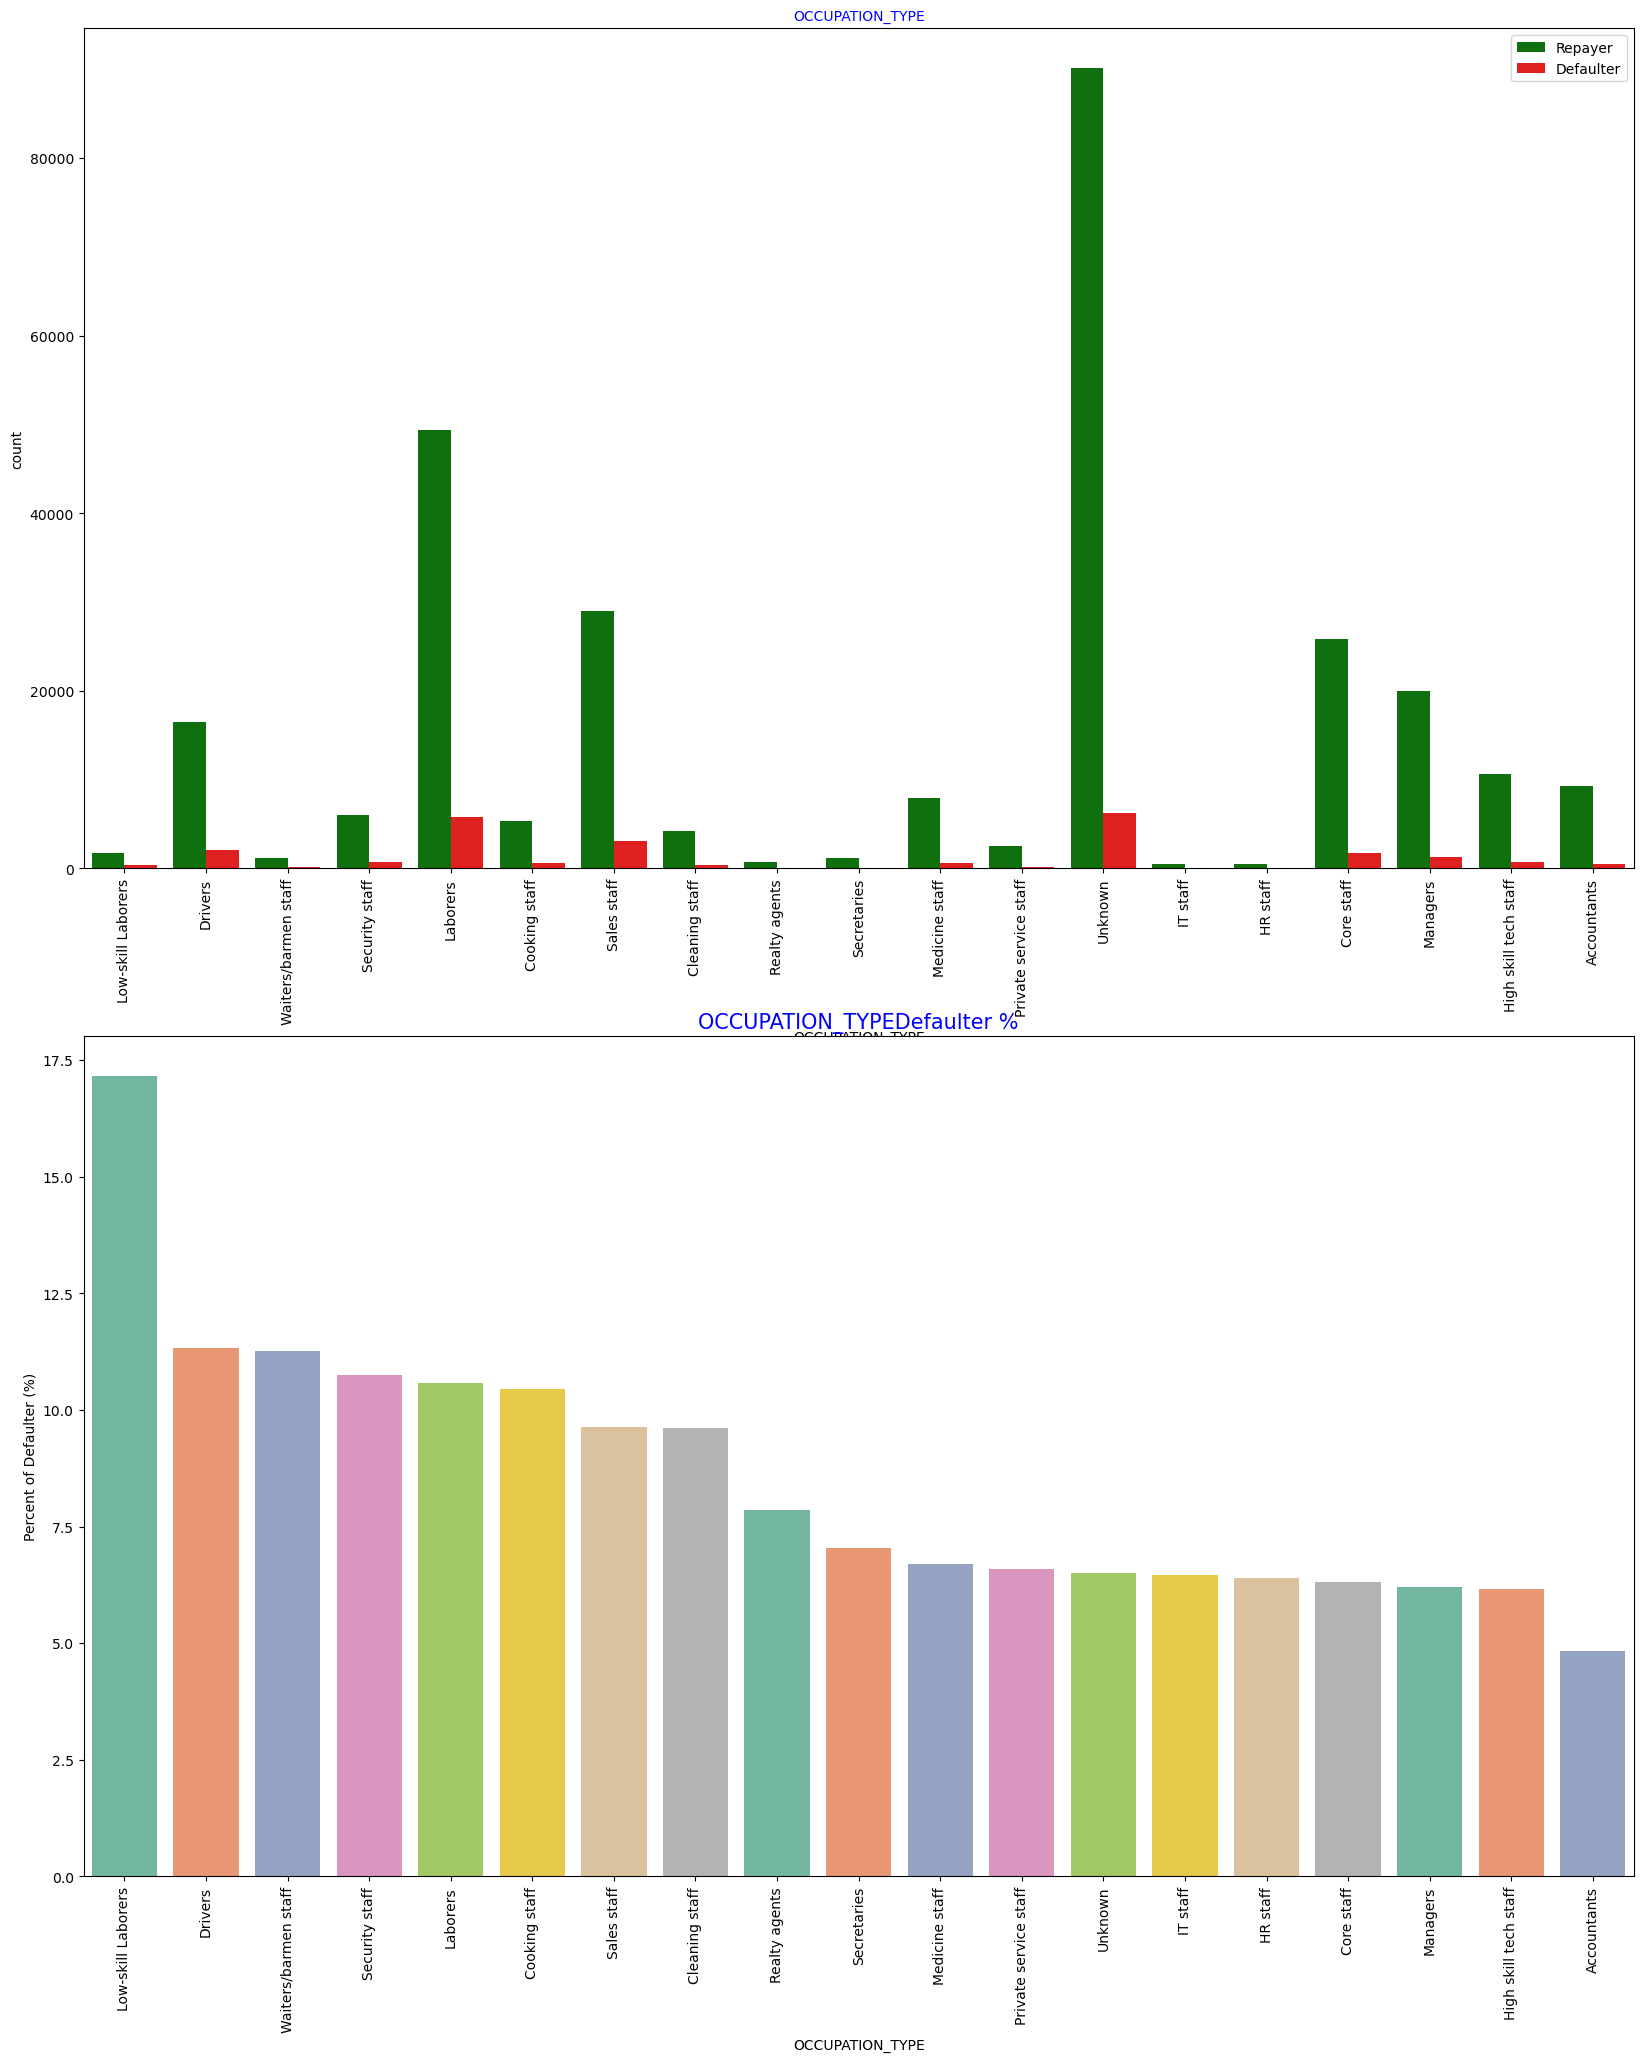

In [95]:
#Analyzing occupation type where applicant lives based on loan repayment status

univariate_categorical('OCCUPATION_TYPE', False, True, False)

Insight:
- Most of the loand are taken by laborers, followed by sales staff. IT staff take the lowest amount of loans.
- Category with highest default rate are Low skill laborers (>17%), followed by Drivers and Waiters/ barmen staff, security staff, laborers and cooking staff

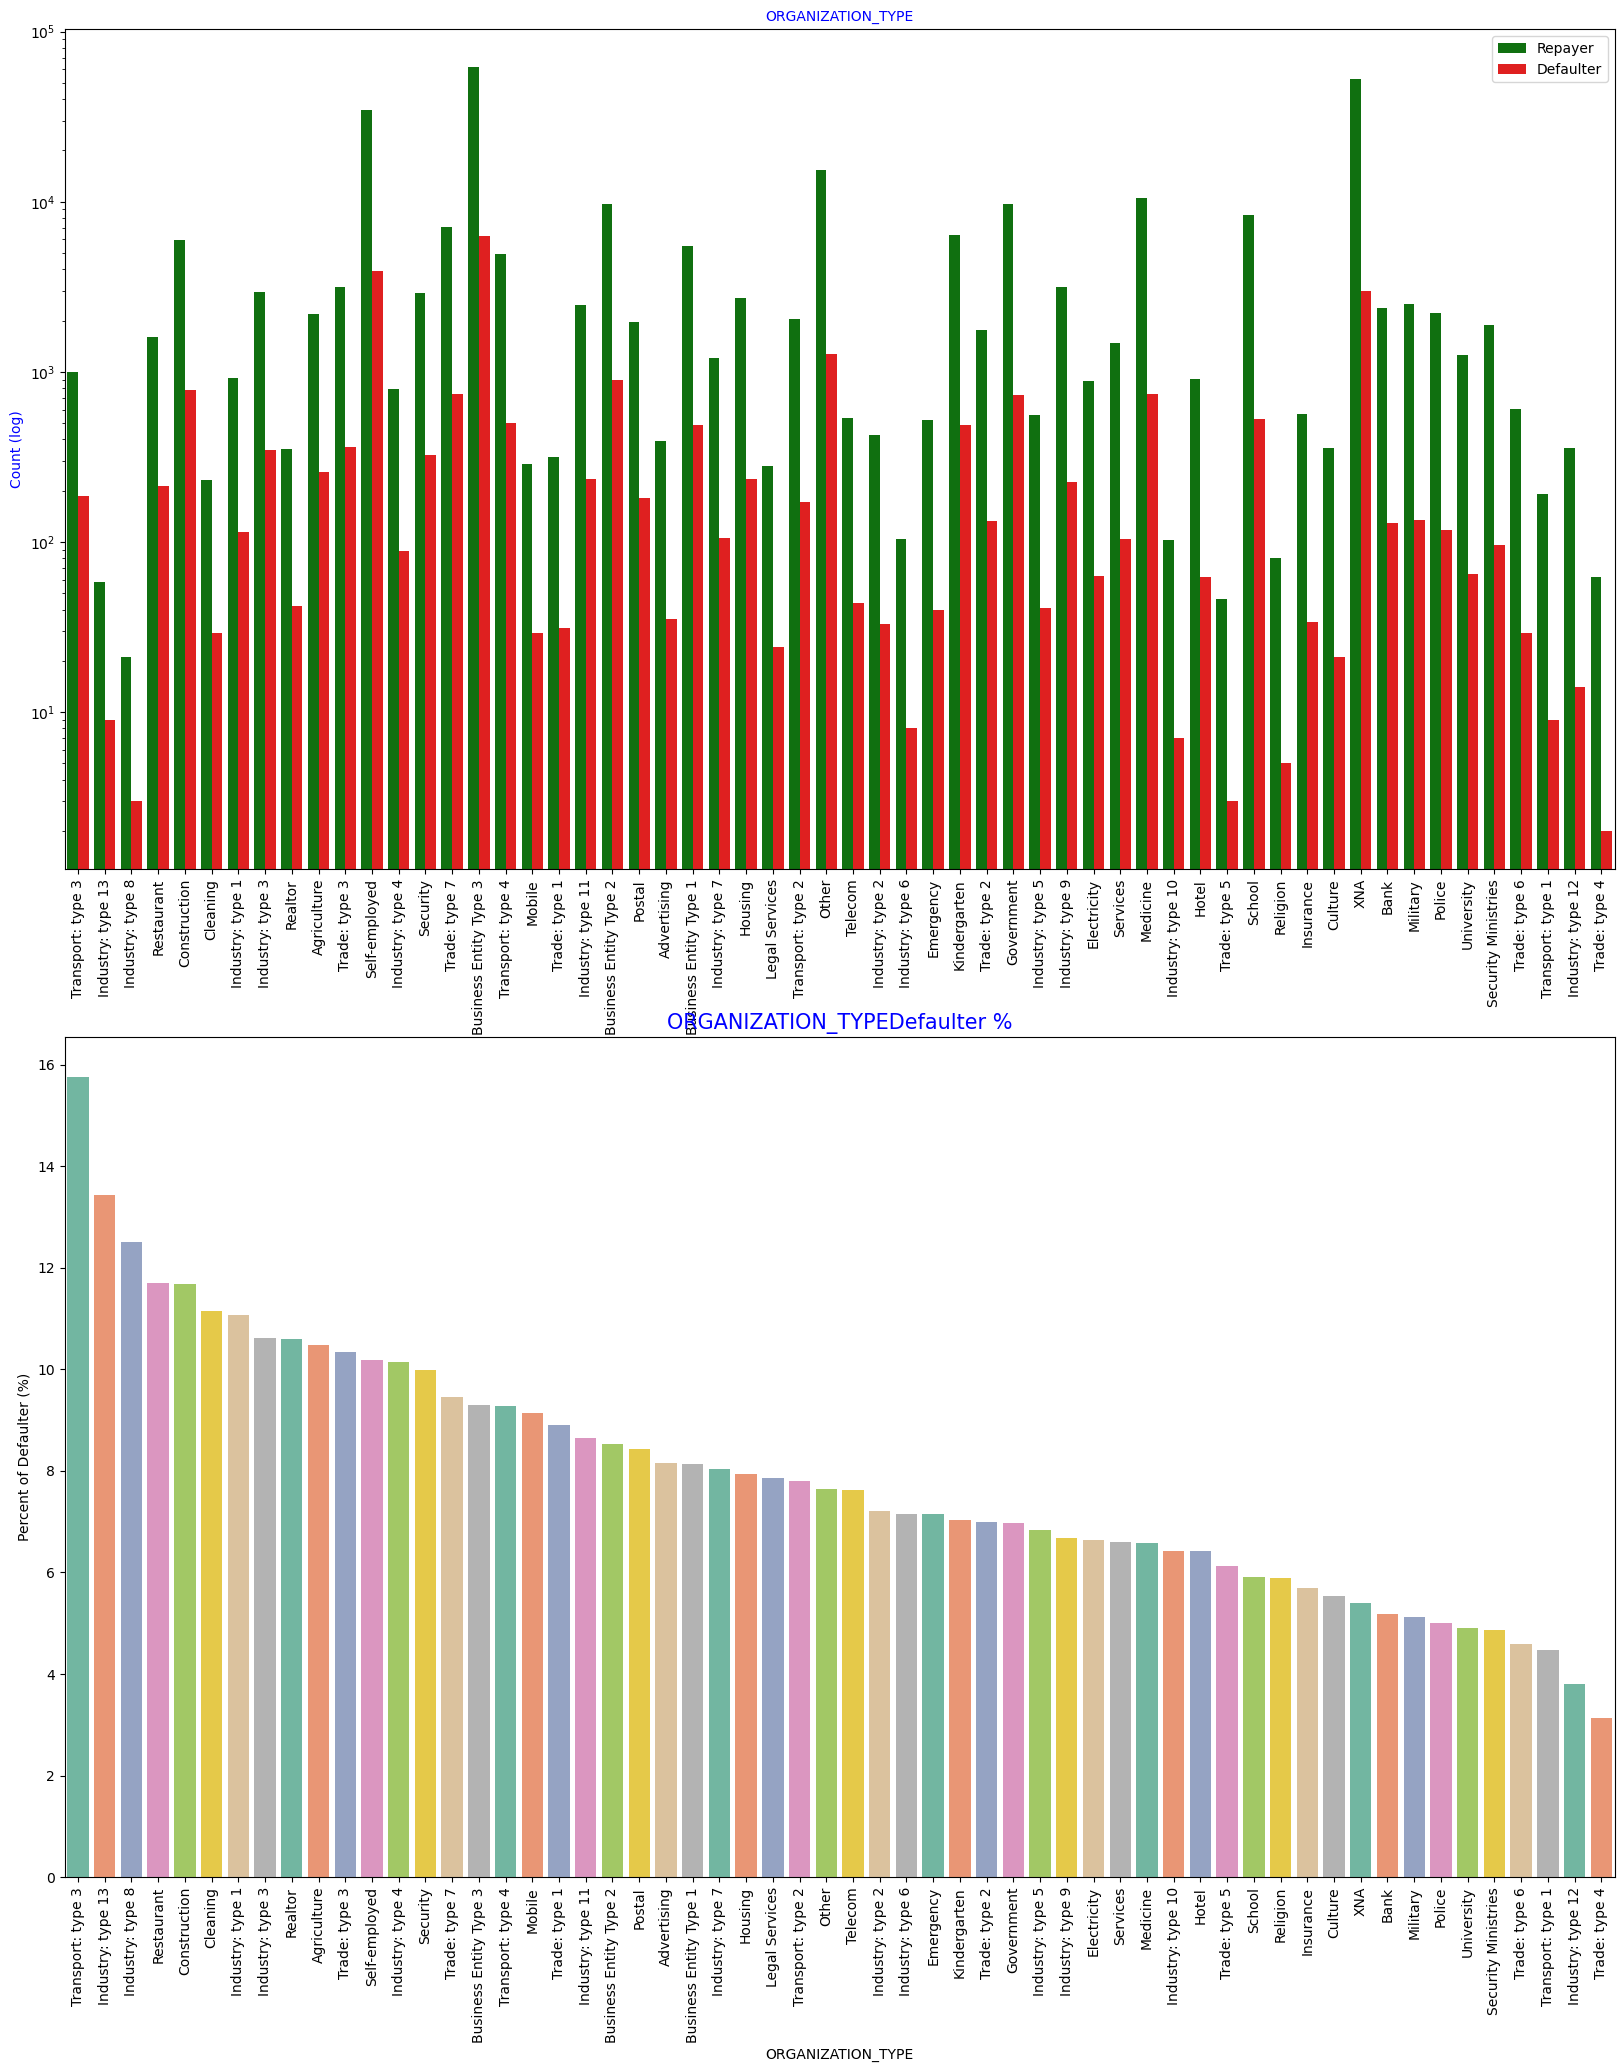

In [96]:
#checking loan repayment status based on organization type

univariate_categorical('ORGANIZATION_TYPE', True, True, False)

Insight:
- Transport: type 3 with highest default rate (16%), Industry: type 8 (12.5%) and restaurant (less than 12%). Self employed people have relative high default rate, thus should be avoided to be approved for loan or get loan at a higher interest rate to mitigate the risk of defaulting.
- Most of the applications are from Business Entity type 3
- Organization type is unavailable (XNA) for a very high number of applications.

- Trade Type 4 and 5, industry type 8 have lower default rates, hence are safer to give loans.

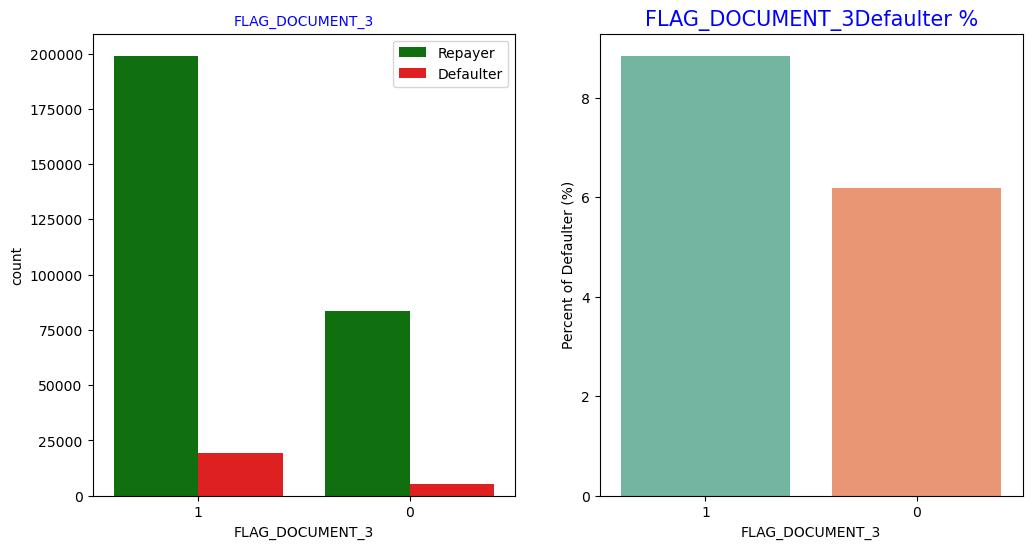

In [97]:
# Analysing Flag_DOc_3 submission status based on loan repayment status

univariate_categorical('FLAG_DOCUMENT_3', False, False, True)

Insight:
- There is no significant correlation between repayers and defaulter in terms of submitting the document, as even if the applicants submitted the document they are defaulter (approx 9%) than those who have not submitted.

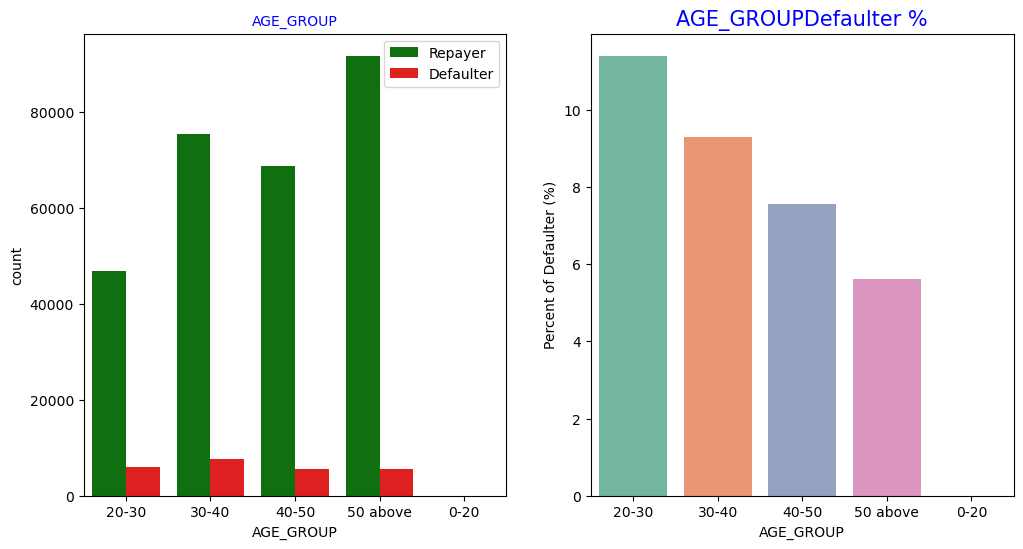

In [98]:
#Analyzing Age Group based on loan repayment status
univariate_categorical('AGE_GROUP', False, False, True)

Insight:
- People in the age group range (20-40) have higher probability of defaulting.
- People above age 50 have low probability of defaulting.

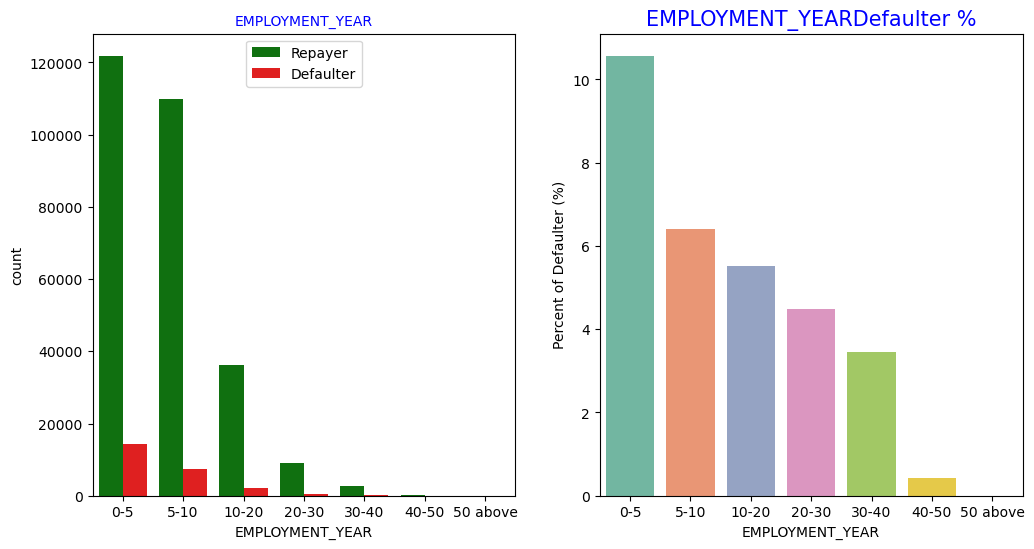

In [99]:
#Analysing Employment_Year based on loan repayment status

univariate_categorical('EMPLOYMENT_YEAR', False, False, True)

Insight:
- Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%
- With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

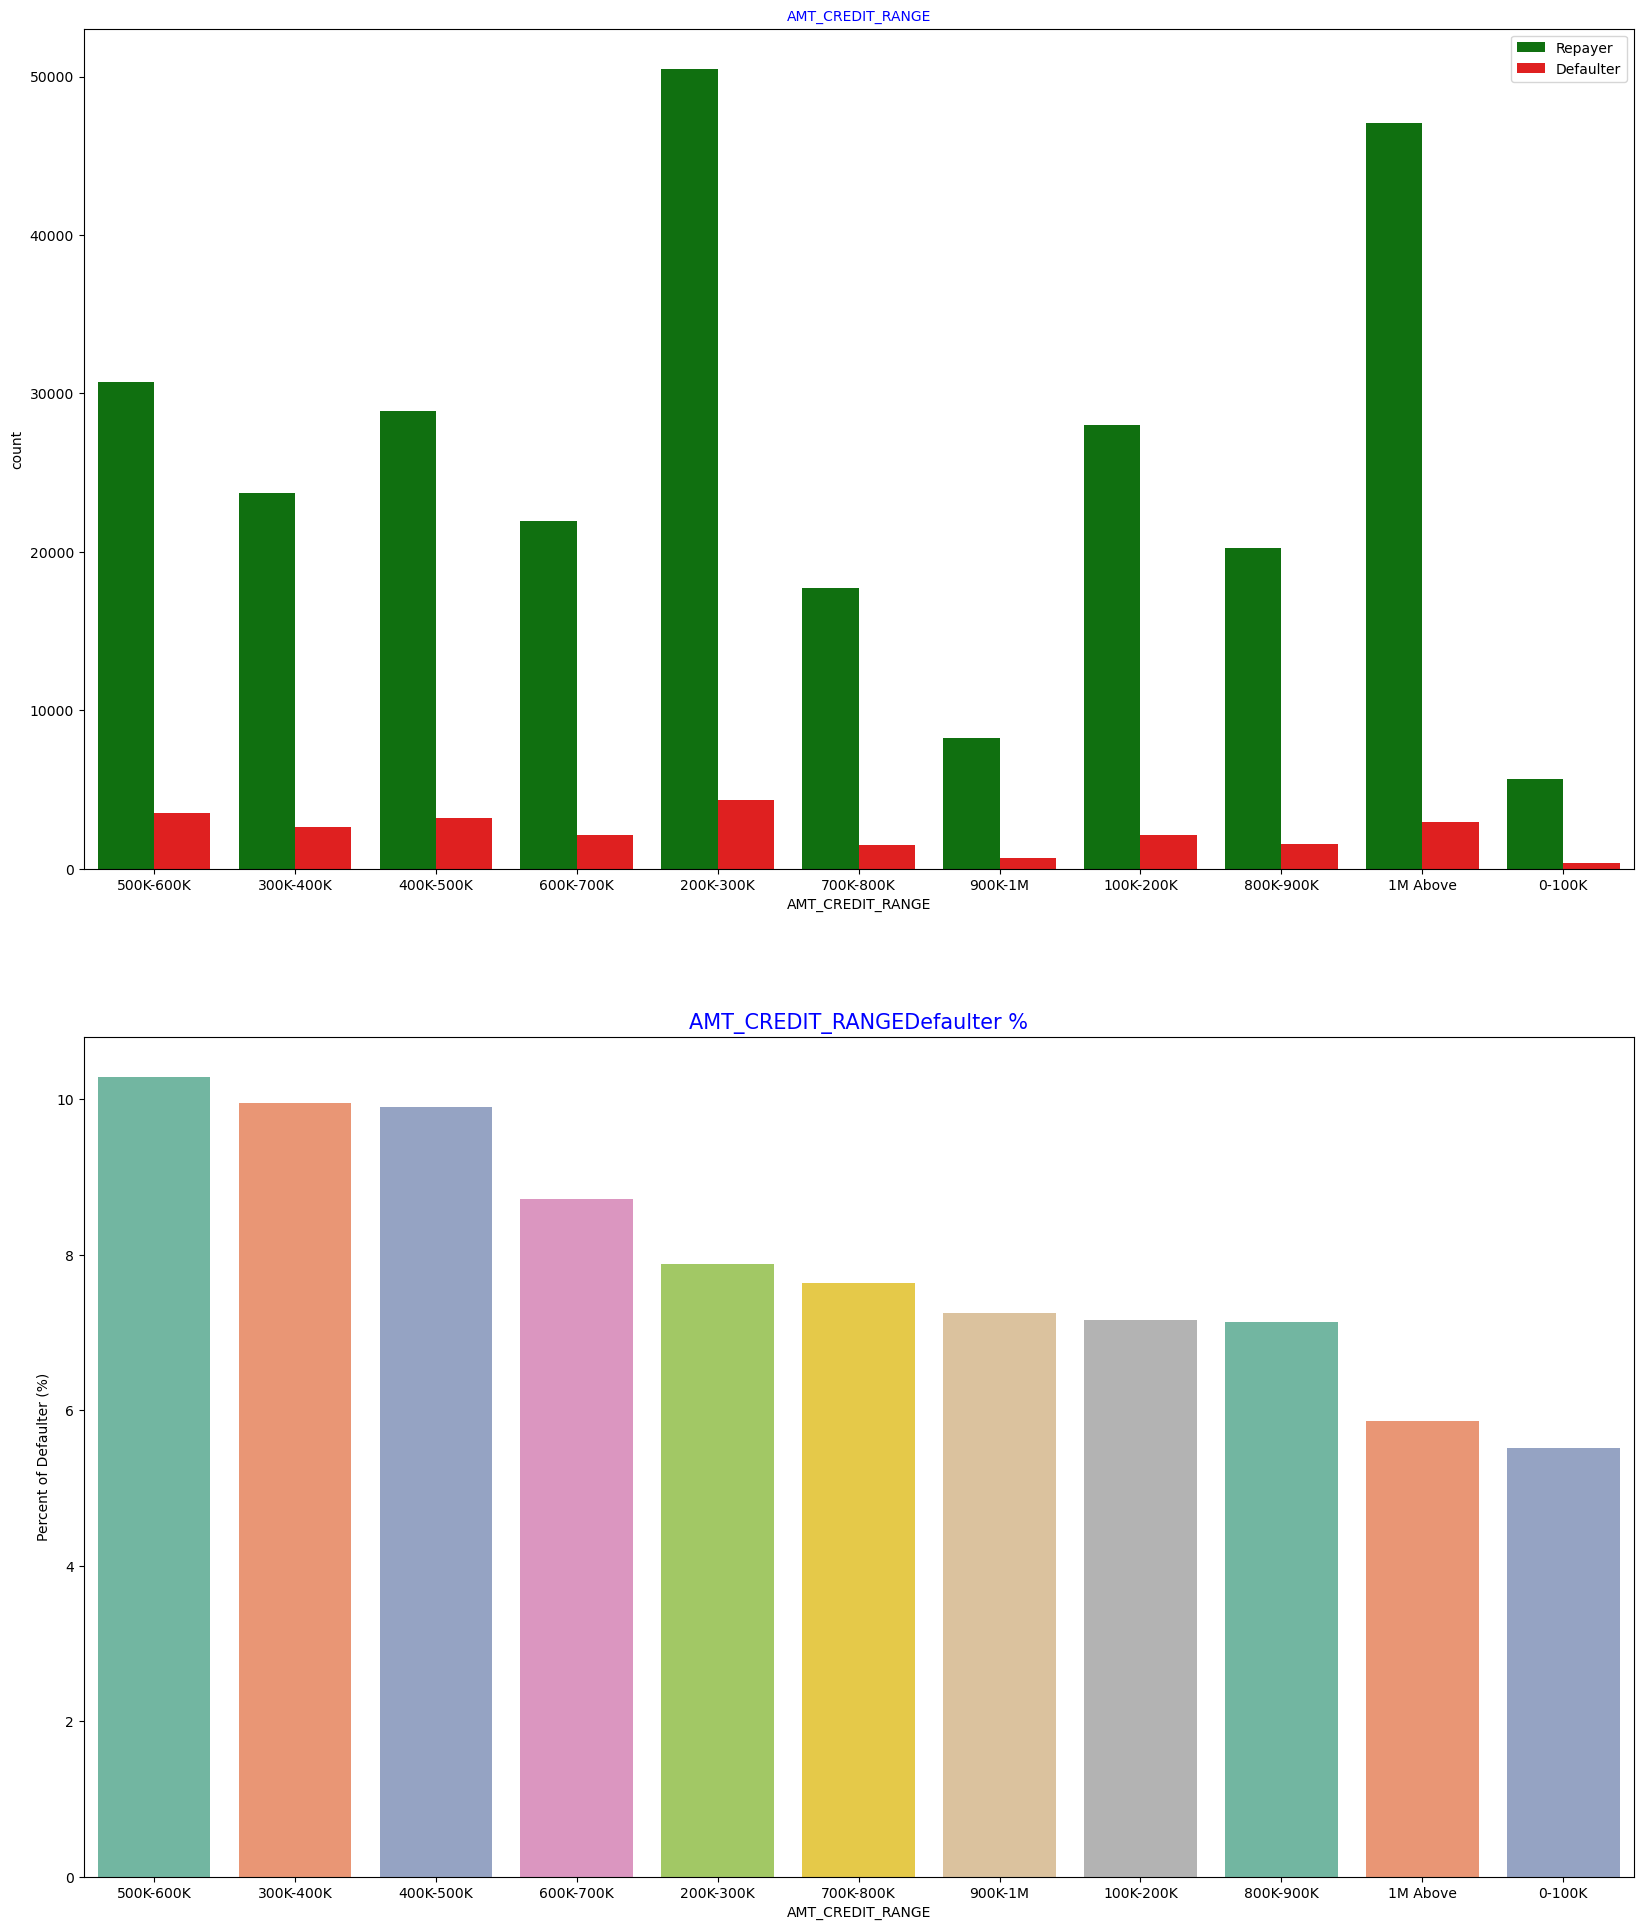

In [100]:
#Analyzing Amount_Credit based on loan repayment status

univariate_categorical('AMT_CREDIT_RANGE', False, False, False)

Insight:
- More than 80% of the loan provided are for amount less than 900,000
- People who get loan for 300-600k tend to default more than others.

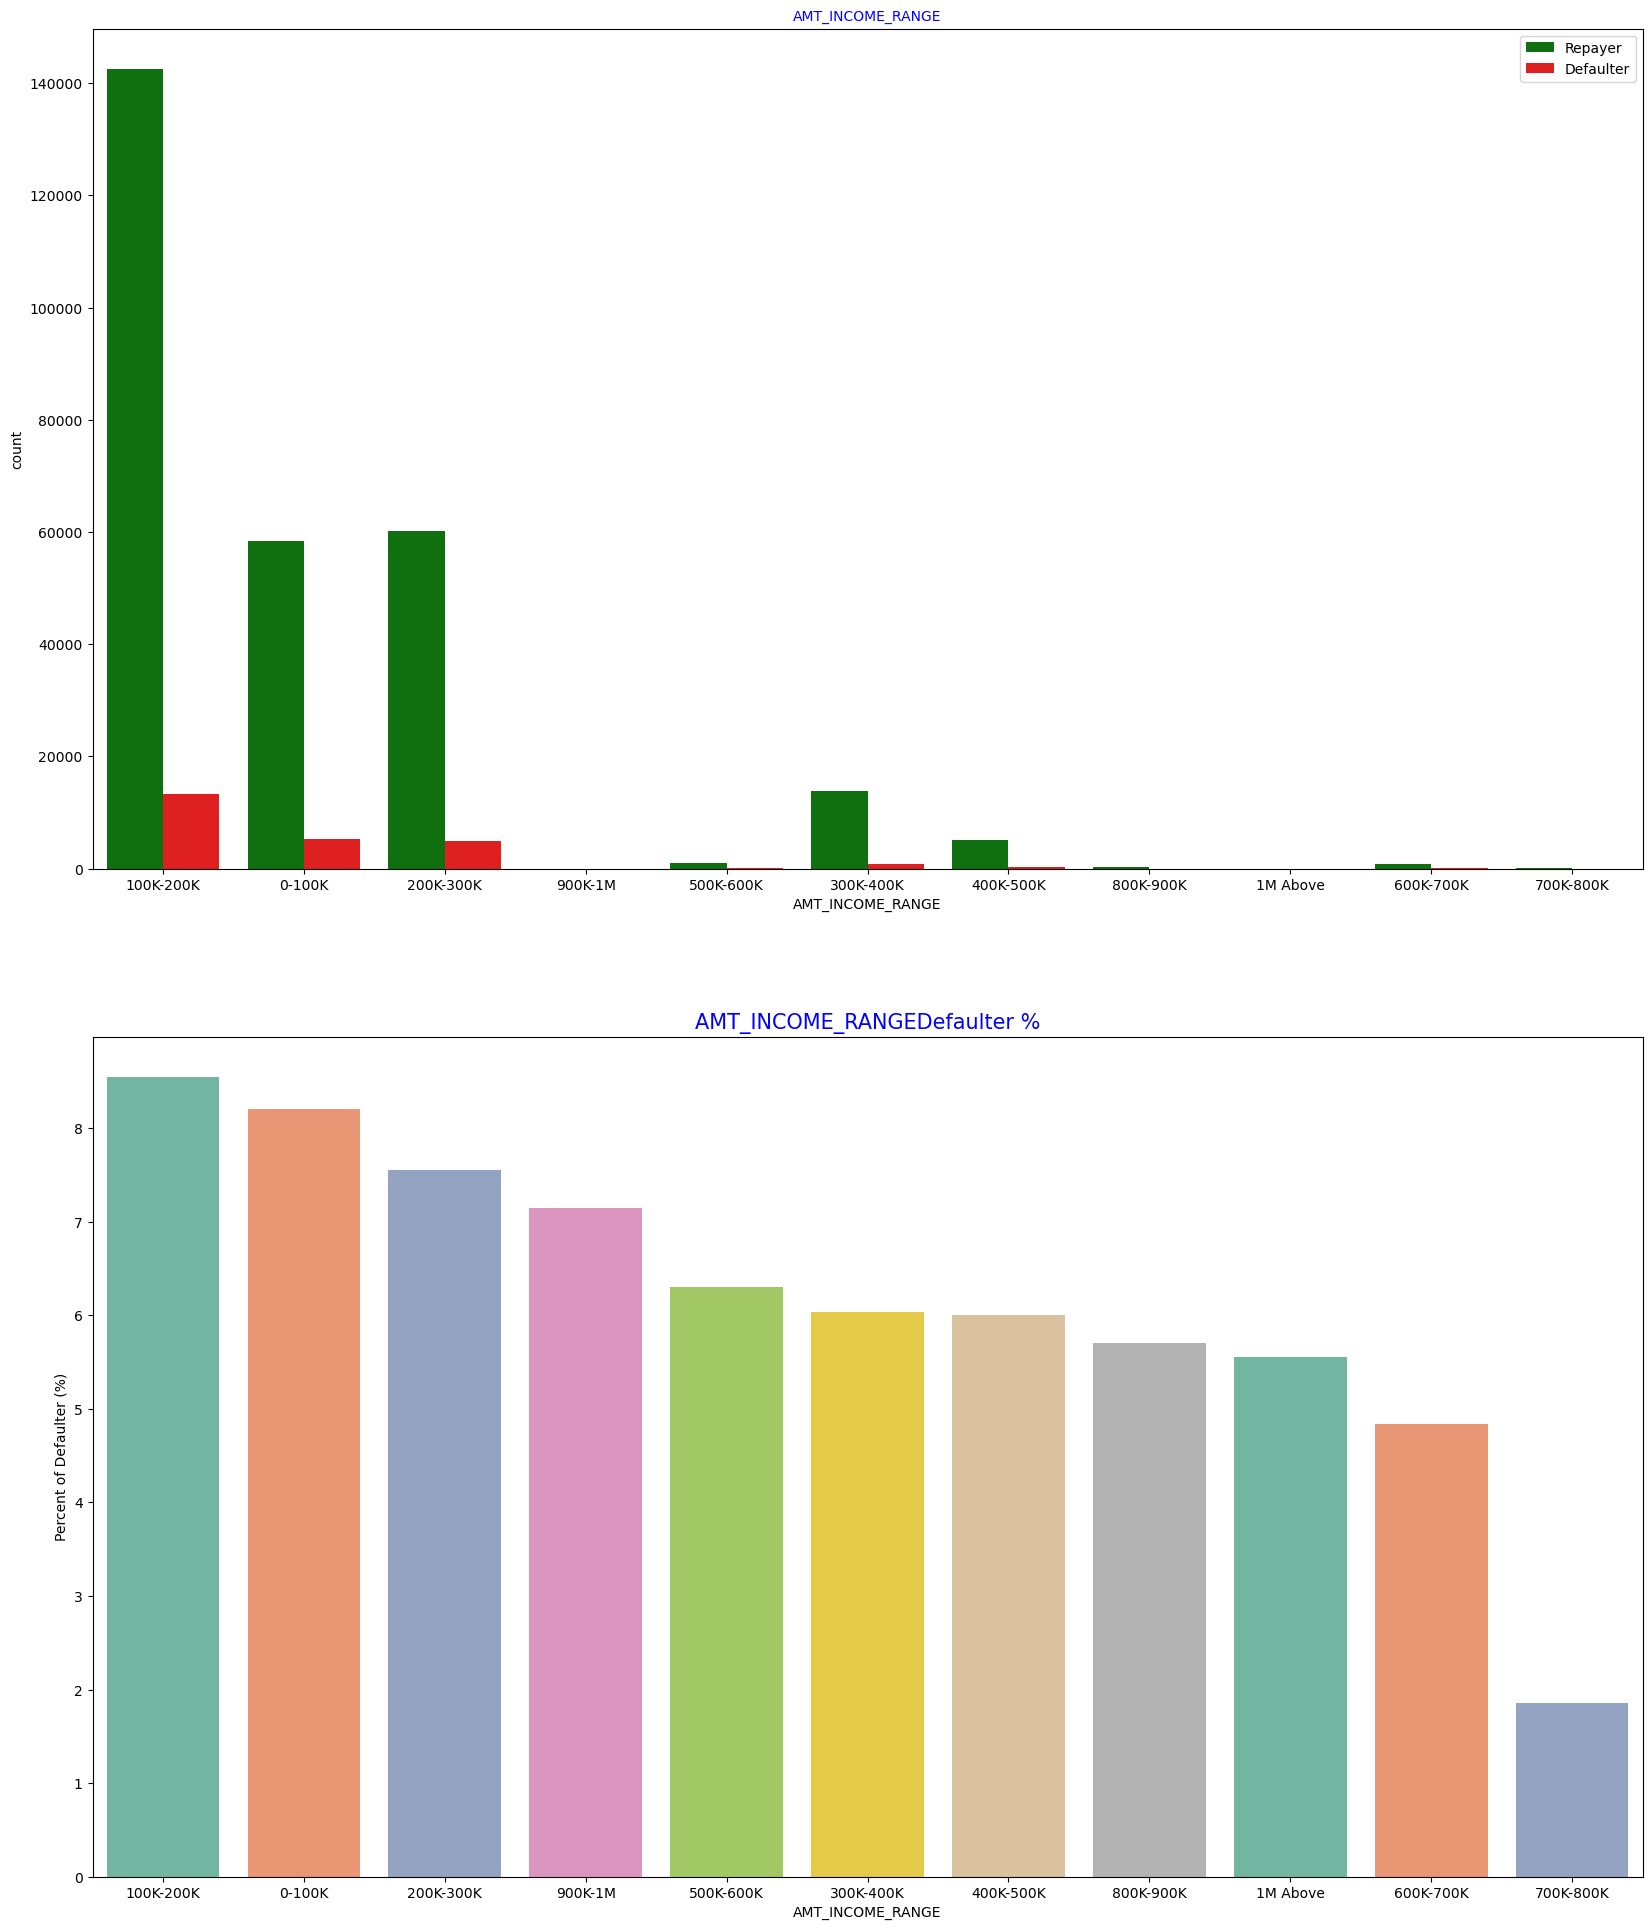

In [101]:
#Analysing Amount_Income Range based on loan repayment status
univariate_categorical('AMT_INCOME_RANGE', False, False, False)

Insight:
- 90% of the applications have Income total less than 300,000
- Application with Income less than 300,000 has high probability of defaulting
- Applicant with Income more than 700,000 are less likely to default

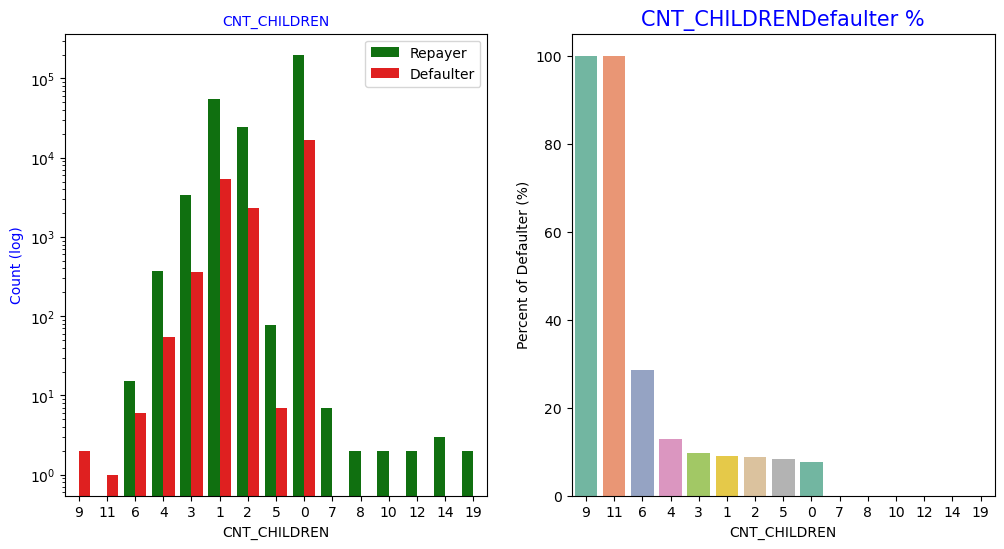

In [102]:
#Analyzing number of children based on loan repayment status
univariate_categorical('CNT_CHILDREN', True)

Insight:
- Majority of applicants do not have children.
- Very few clients have more than 3 children.
- Customers with more than 4 children have high default rate, cusotmers with 9 and 11 children have 100% default rate.

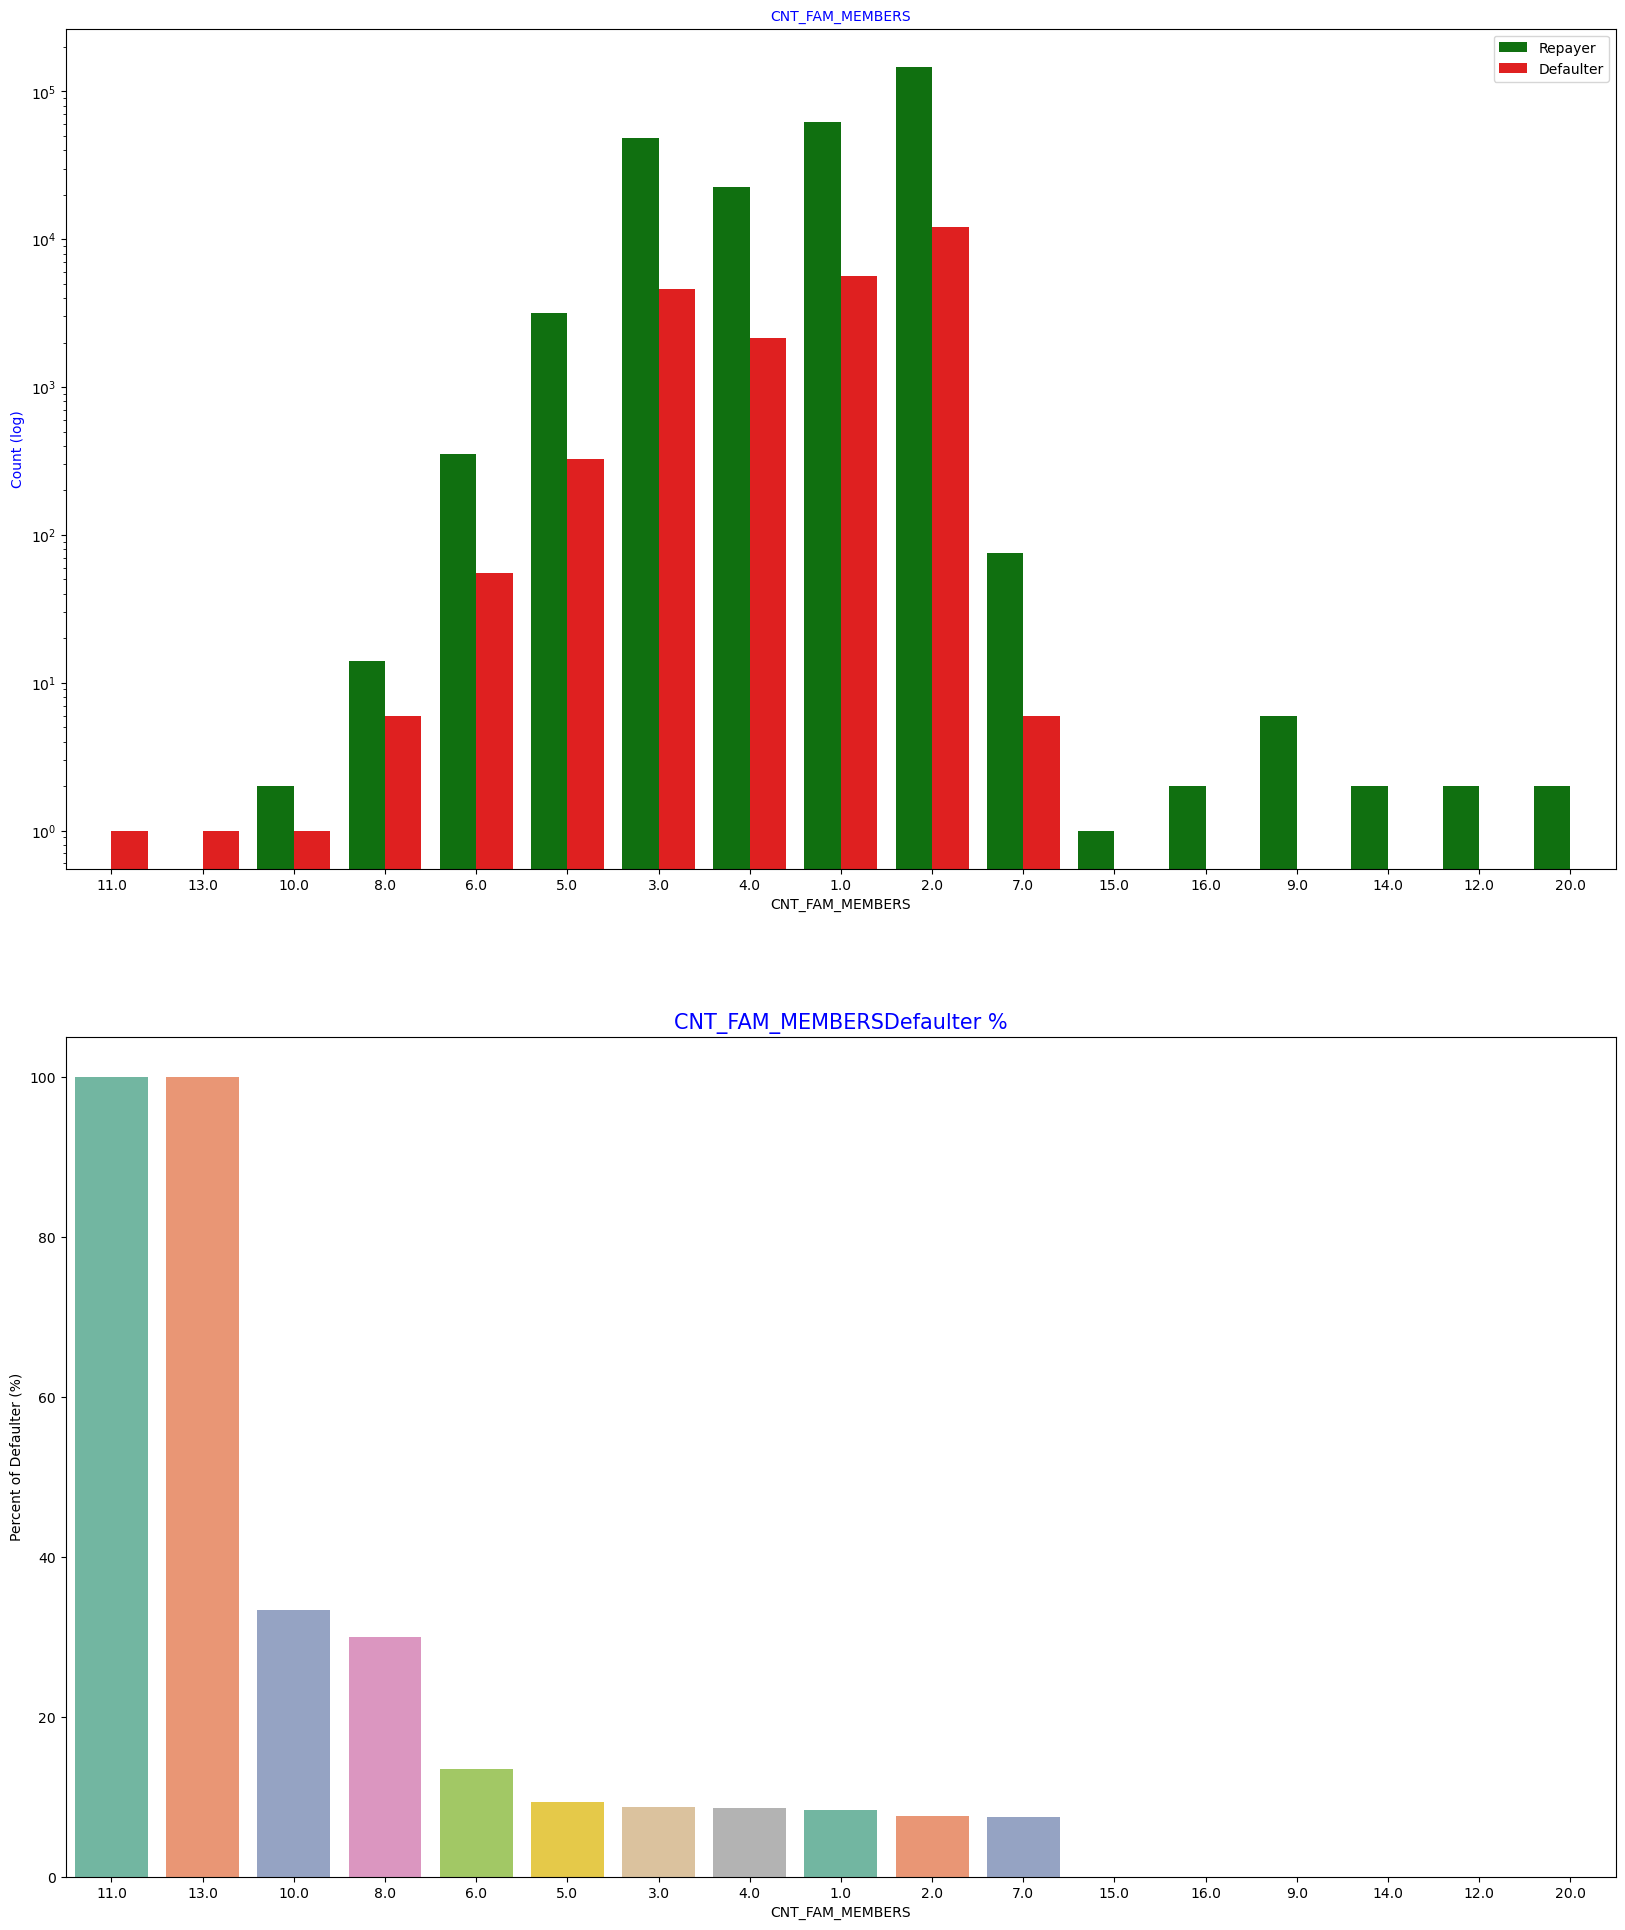

In [103]:
#Analyzing number of family memebers based
univariate_categorical('CNT_FAM_MEMBERS', True, False, False)

Insight:
- Family members follow the same trend as children where having more family members increase the risk of defaulting.

## Categorical Bi/ Multivariate Analysis

In [104]:
application_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

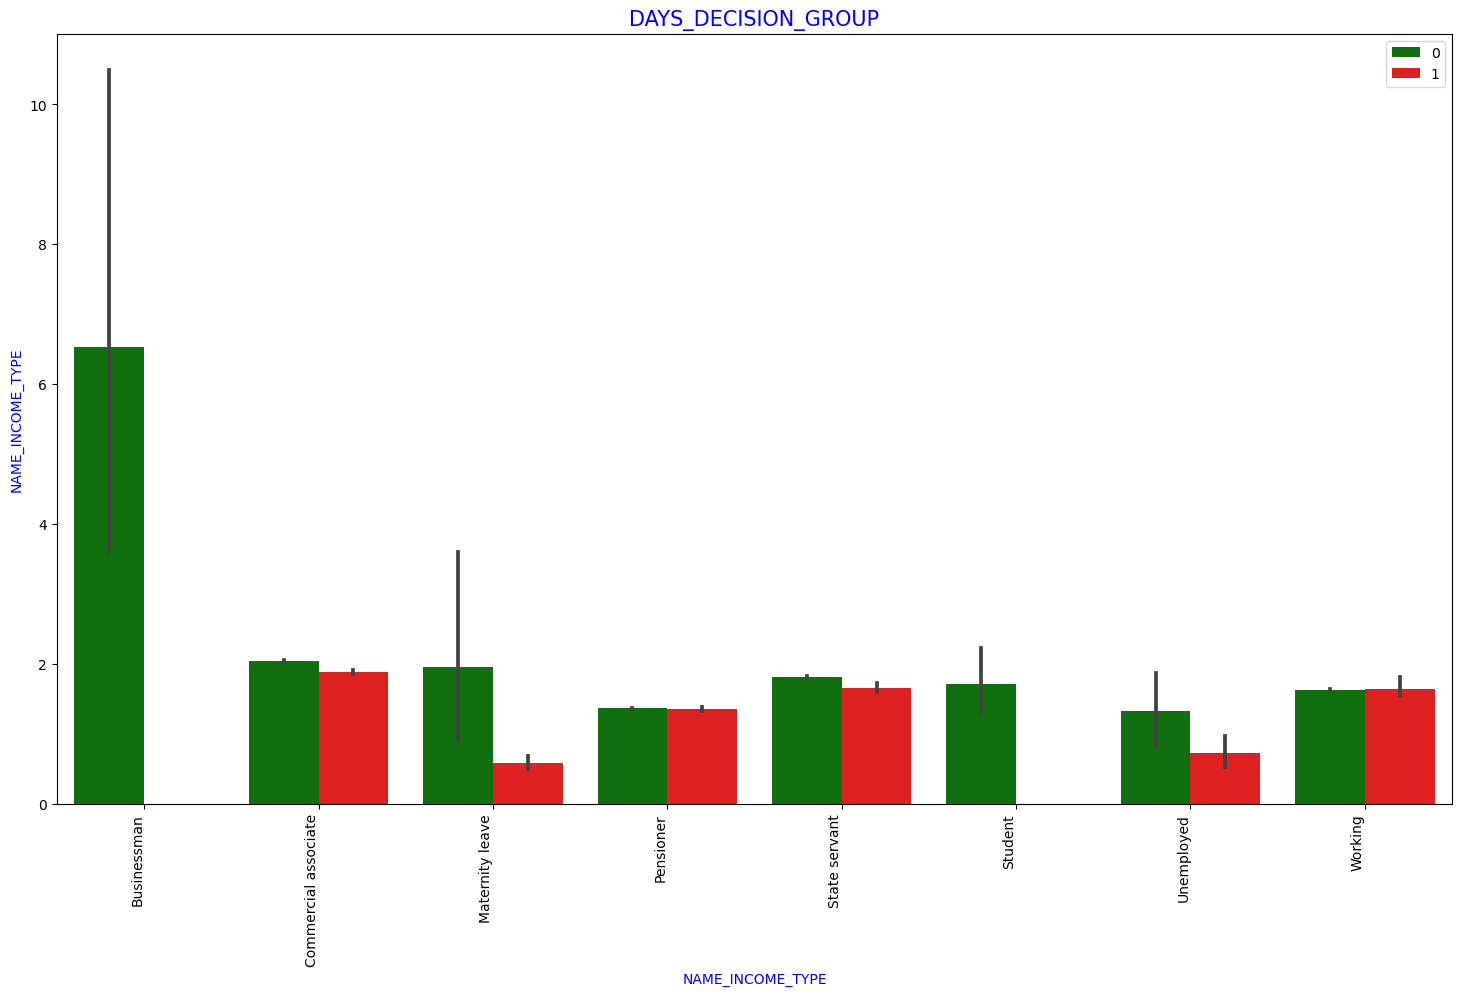

In [139]:
#Income type vs income amount range
bivariate_bar('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', application_df, 'TARGET',(18,10))

Insight: Businessman's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs.

### Numeric Vairables Analysis

#### Bifurcating application df based on Target value 0 and 1 for correlation and other analysis

In [106]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [107]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = application_df.loc[application_df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = application_df.loc[application_df['TARGET']==1, cols_for_correlation] # Defaulters

#### Correlation between numeric variables

In [108]:
#Getting top 10 correlation for the repayers data

numeric_columns = Repayer_df.select_dtypes(include=[np.number])
corr_repayer = numeric_columns.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

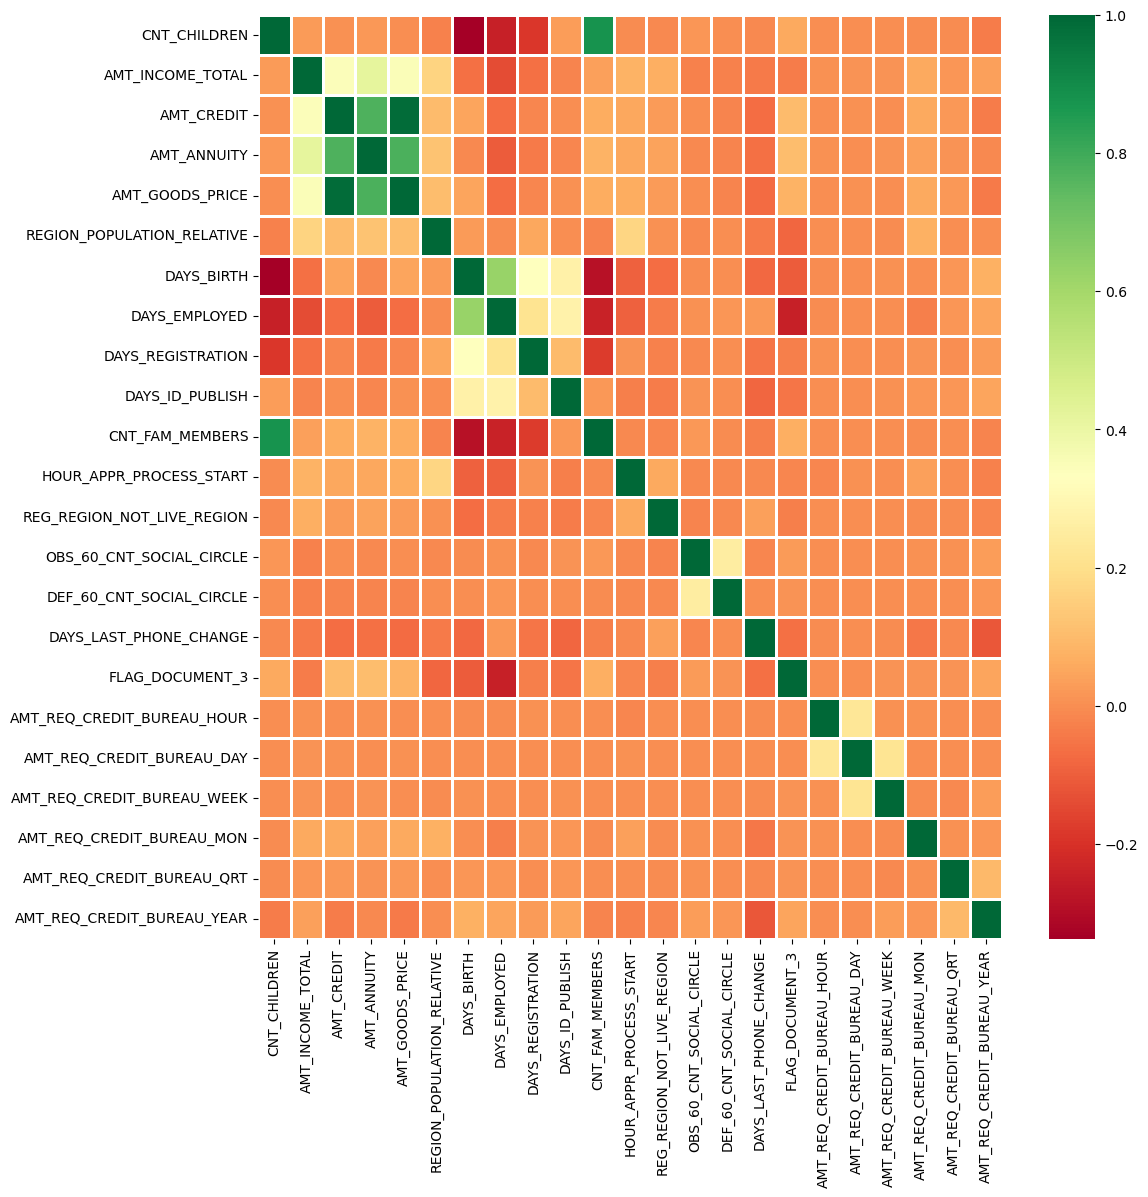

In [109]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(numeric_columns.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Insight:
- Credit amount is highly correlated with
(a) amount of goods price
(b) loan annuity
(c) total income

Repayers have high correlation in number of days employed

In [110]:
# Getting the top 10 correlation for the Defaulter data

numeric_columns_d = Defaulter_df.select_dtypes(include=[np.number])


corr_Defaulter = numeric_columns_d.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool_))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

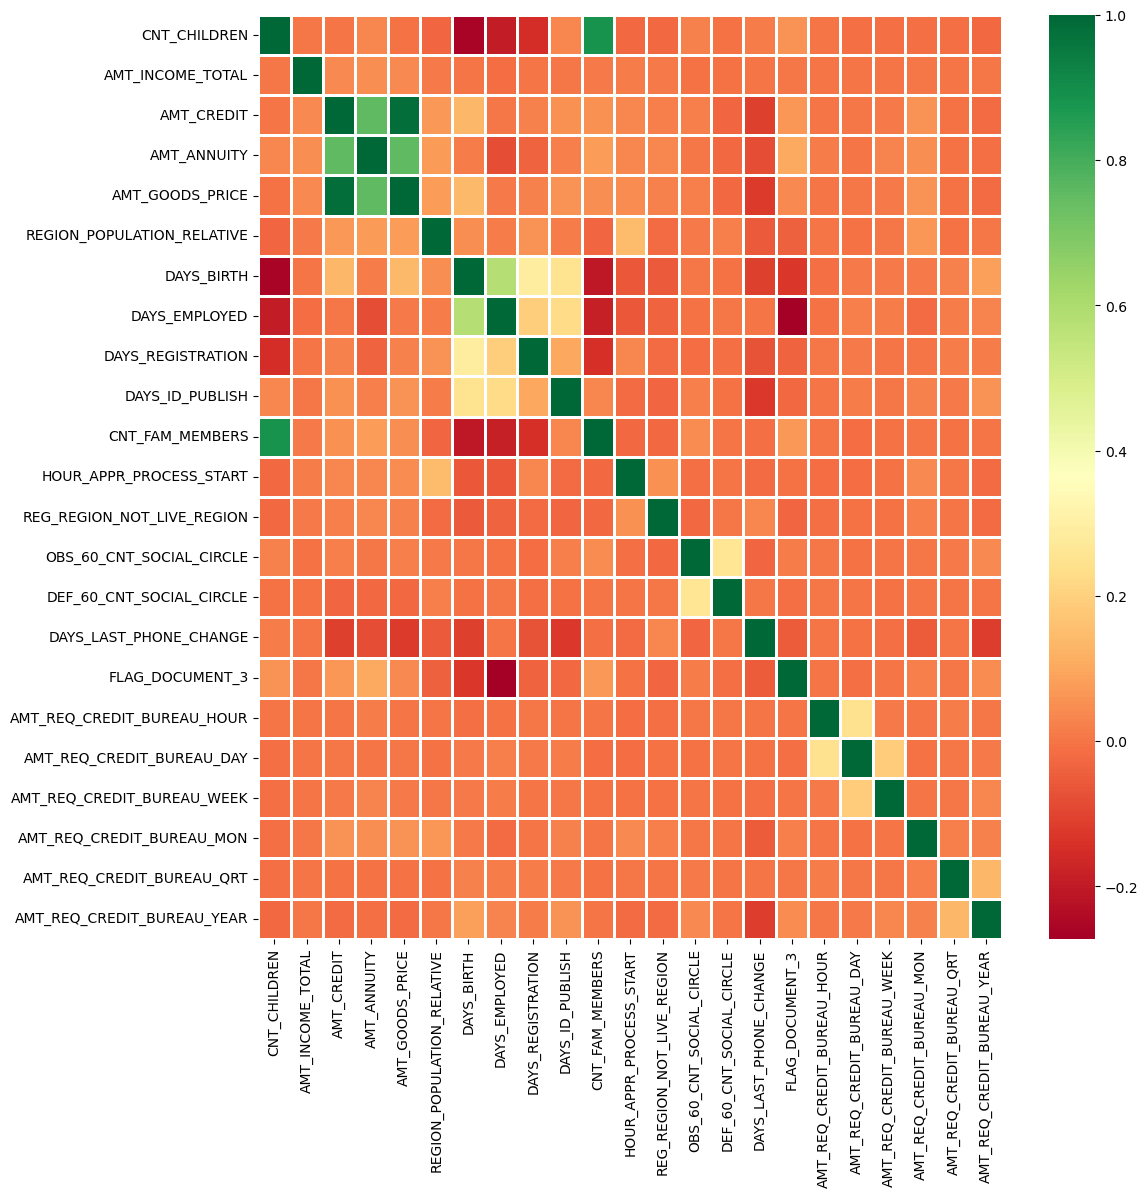

In [111]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(numeric_columns_d.corr(), cmap="RdYlGn",annot=False,linewidth =1)

Insights:
- Credit amount is highly correlated with amount of goods price which is same as repayers.
- But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
- We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
- There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
- Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
- There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

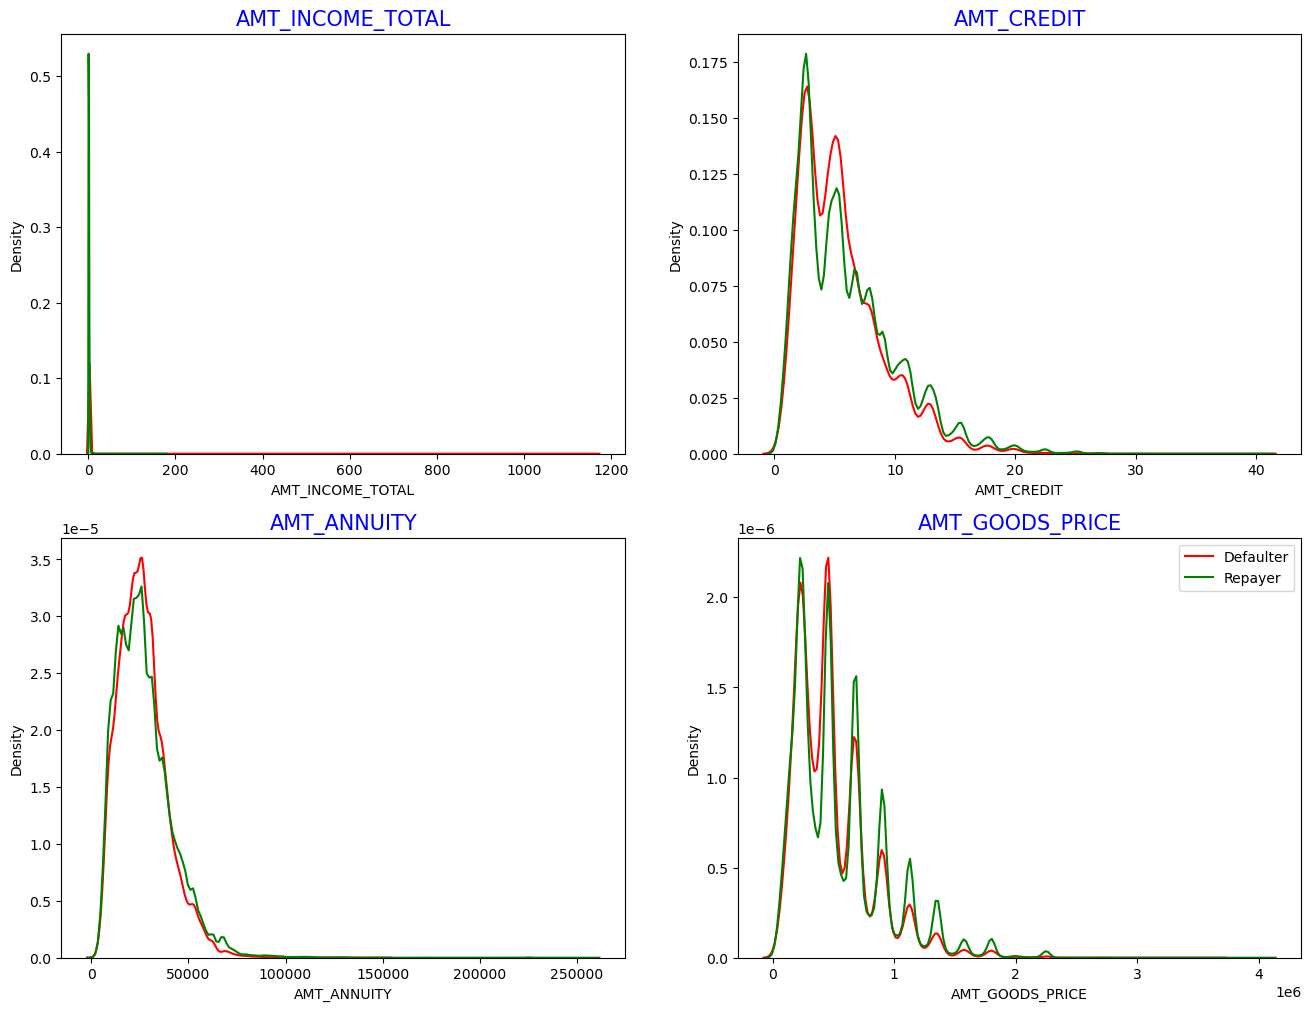

In [112]:
# Numerical univariate analyss

amount = application_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Insight:
- Most no of loans are given for goods price below 10 lakhs (values on x-axis are e^6 form).
- Most people pay annuity below 50000 for the credit loan
- Credit amount of the loan is mostly less then 10 lakhs
- The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

<Figure size 1500x600 with 0 Axes>

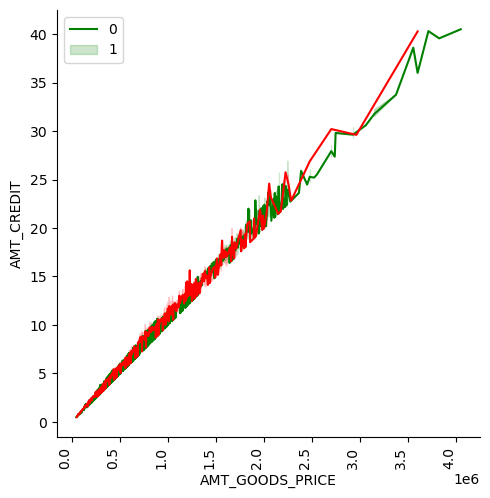

In [141]:
# Numerical Bivariate Analysis

# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_df,"TARGET", "line", ['g','r'], False,(15,6))


Insight: When credit amount goes beyond 30 there is an increase in defaulters.

In [119]:
## Merged Dataframe Analysis

#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(application_df, previous_df, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_DECISION_GROUP
0      100002       1           Cash loans           M            N               Y             0             2.025      4.065975        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200K-300K        400K-500K   25     20-30               1             0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest             400-800
1      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200K-300K         1M Above   45     40-50               3    

In [120]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [121]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [122]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [123]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.413701e+06  1.413701e+06  1.413701e+06      1.413701e+06  1.413701e+06   1.413608e+06       1.412493e+06                1.413701e+06  1.413701e+06   1.413701e+06       1.413701e+06     1.413701e+06     1.413701e+06             1.413701e+06                1.413701e+06              1.410555e+06              1.410555e+06              1.410555e+06              1.410555e+06            1.413701e+06     1.413701e+06                1.413701e+06               1.413701e+06                1.413701e+06               1.413701e+06               1.413701e+06                1.413701e+06  1.413701e+06    1.413701e+06  1.413701e+06   1.413701e+06     1.413701e+06  1.413700e+06       1.413701e+06   1.413701e+06      1.413701e+06  1.413701e+06
mean   2.784813e+05  8.655296e-02  4.048933e-01      1.733160e+00  5.875537e+00   2.701702e+04       5.277186e+05                2.074985e-02  1.632105e+04   7.266347e+04       5.003233e+03     3.034563e+03     2.150501e+00             1.198433e+01                1.207327e-02              1.544176e+00              1.540436e-01              1.526303e+00              1.080426e-01           -1.084701e+03     7.385600e-01                5.484894e-03               6.028149e-03                3.410198e-02               2.664913e-01               3.196935e-01                2.691239e+00  4.421384e+01    1.615619e+01  1.922744e+06   1.484032e+04     1.752436e+05  1.963541e+05       1.854396e+05   8.803670e+02      3.149878e+02  1.256367e+01
std    1.028118e+05  2.811789e-01  7.173454e-01      1.985734e+00  3.849173e+00   1.395116e+04       3.532465e+05                1.334702e-02  4.344557e+03   1.433374e+05       3.551051e+03     1.507376e+03     9.006787e-01             3.232181e+00                1.092132e-01              2.530715e+00              4.658973e-01              2.508953e+00              3.790588e-01            7.999369e+02     4.394192e-01                7.702591e-02               1.001966e-01                2.012902e-01               9.268428e-01               8.781444e-01                2.157176e+00  1.190217e+01    9.638493e+01  5.327153e+05   1.316370e+04     2.936222e+05  3.194813e+05       2.881244e+05   7.835402e+02      7.695082e+03  1.448807e+01
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e-01  4.500000e-01   1.615500e+03       4.050000e+04                2.900000e-04  7.489000e+03   0.000000e+00       0.000000e+00     0.000000e+00     1.000000e+00             0.000000e+00                0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00              0.000000e+00           -4.292000e+03     0.000000e+00                0.000000e+00               0.000000e+00                0.000000e+00               0.000000e+00               0.000000e+00                0.000000e+00  2.000000e+01    0.000000e+00  1.000001e+06   0.000000e+00     0.000000e+00  0.000000e+00       0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00
25%    1.893640e+05  0.000000e+00  0.000000e+00      1.125000e+00  2.700000e+00   1.682100e+04       2.385000e+05                1.003200e-02  1.273900e+04   1.042000e+03       2.001000e+03     1.783000e+03     2.000000e+00             1.000000e+01                0.000000e+00              0.00

In [124]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

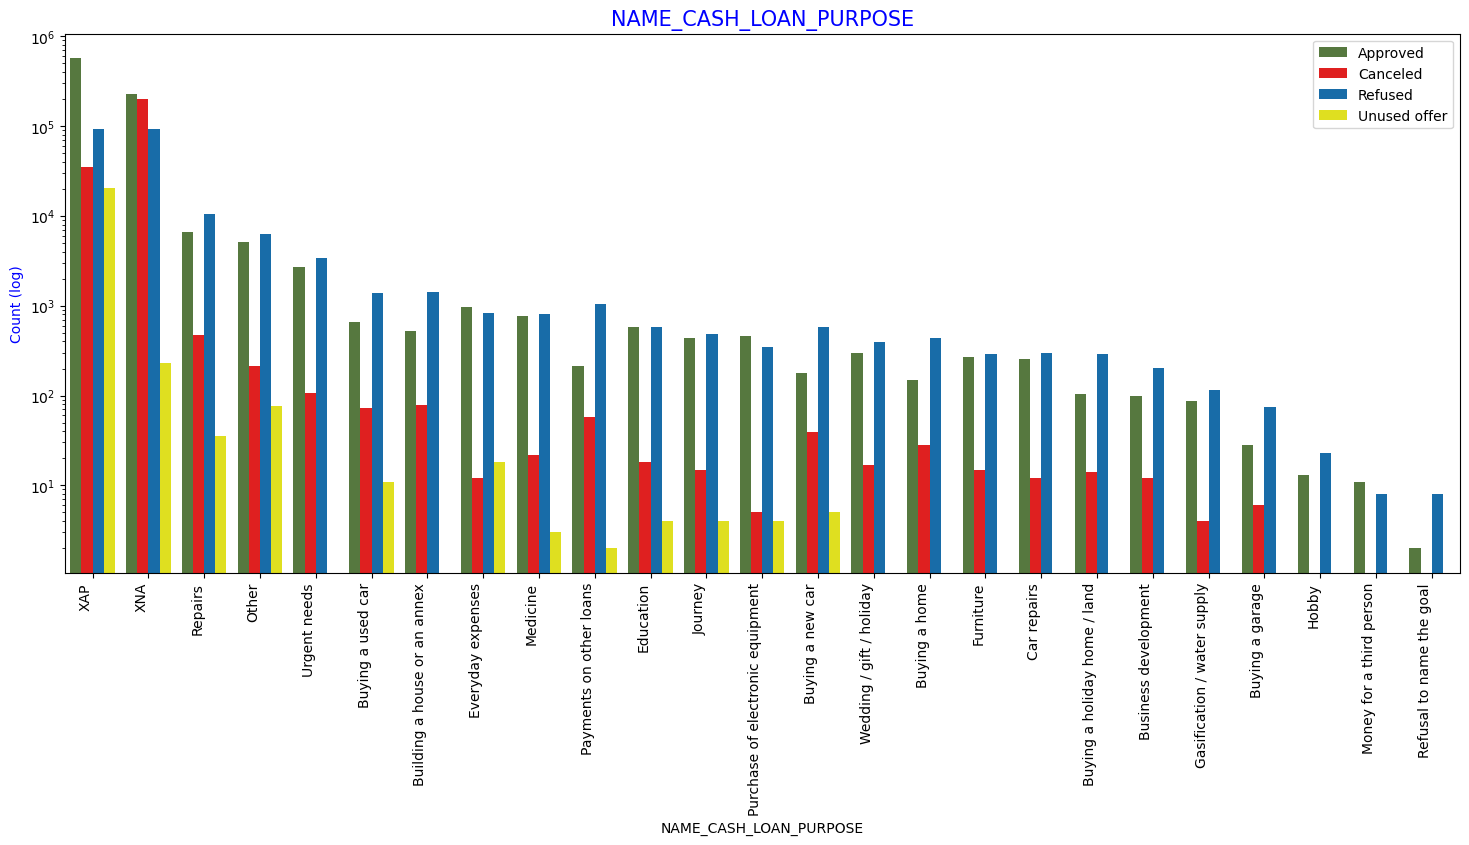

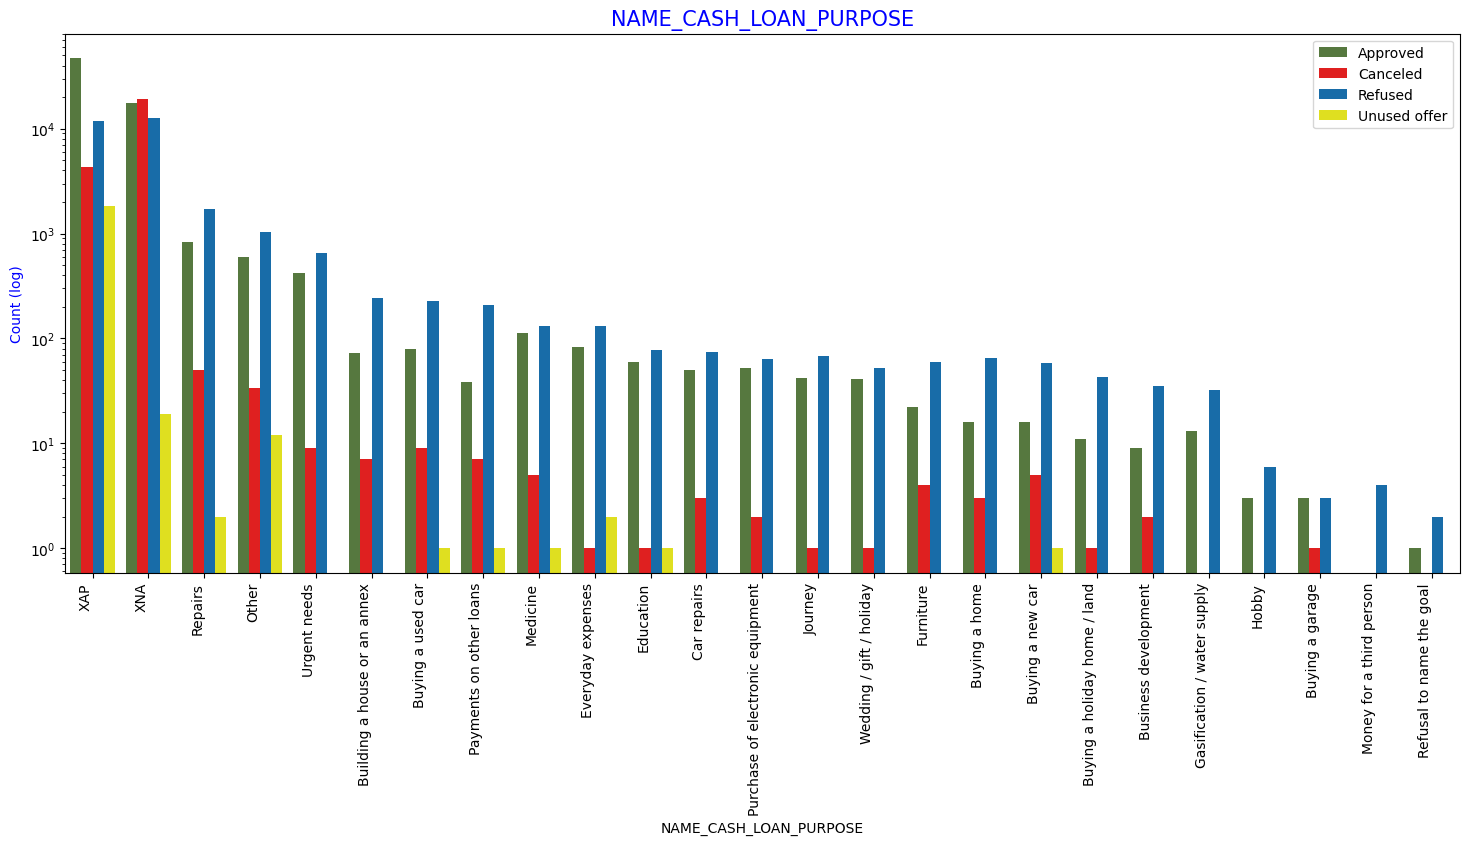

In [125]:
# PLotting Contract Status vs purpose of the loan

univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

Insight:
- Loan purpose has high number of unknown values (XAP, XNA)
- Loan taken for the purpose of Repairs seems to have highest default rate
- A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.

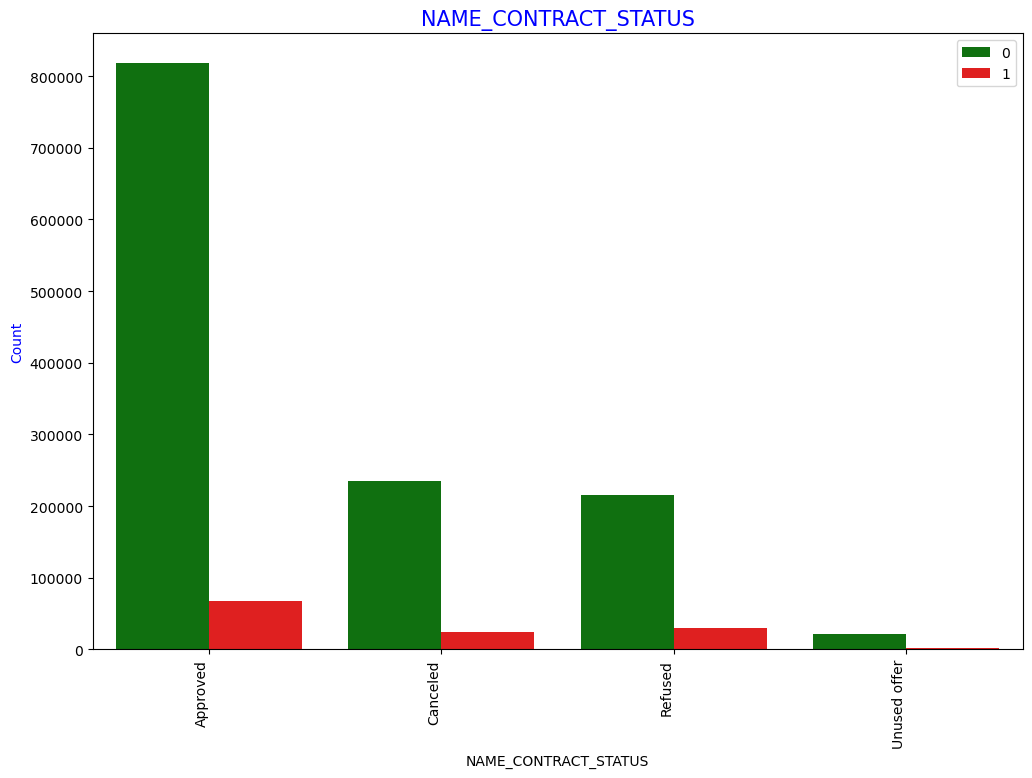

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [126]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

Insight:
- 90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
- 88% of the clients who have been previously refused a loan has payed back the loan in current case.
- Refusal reason should be recorded for further analysis as these clients would turn into potential repaying customer.

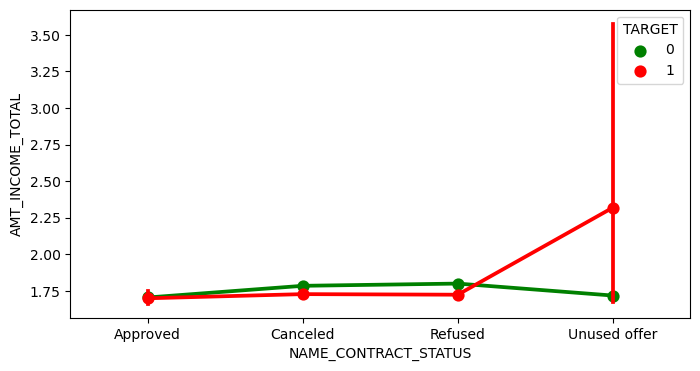

In [127]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

Insight:
- The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others

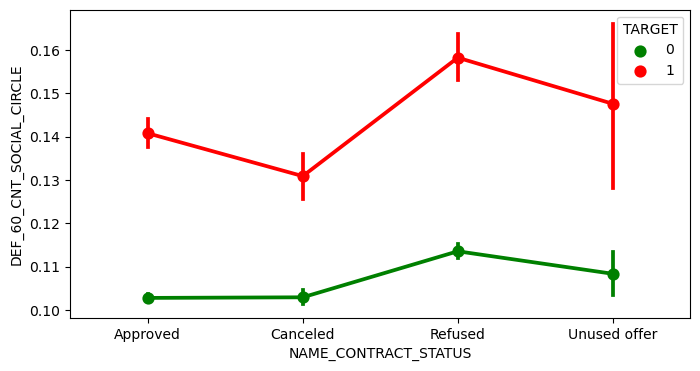

In [142]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

Insight:
- Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.